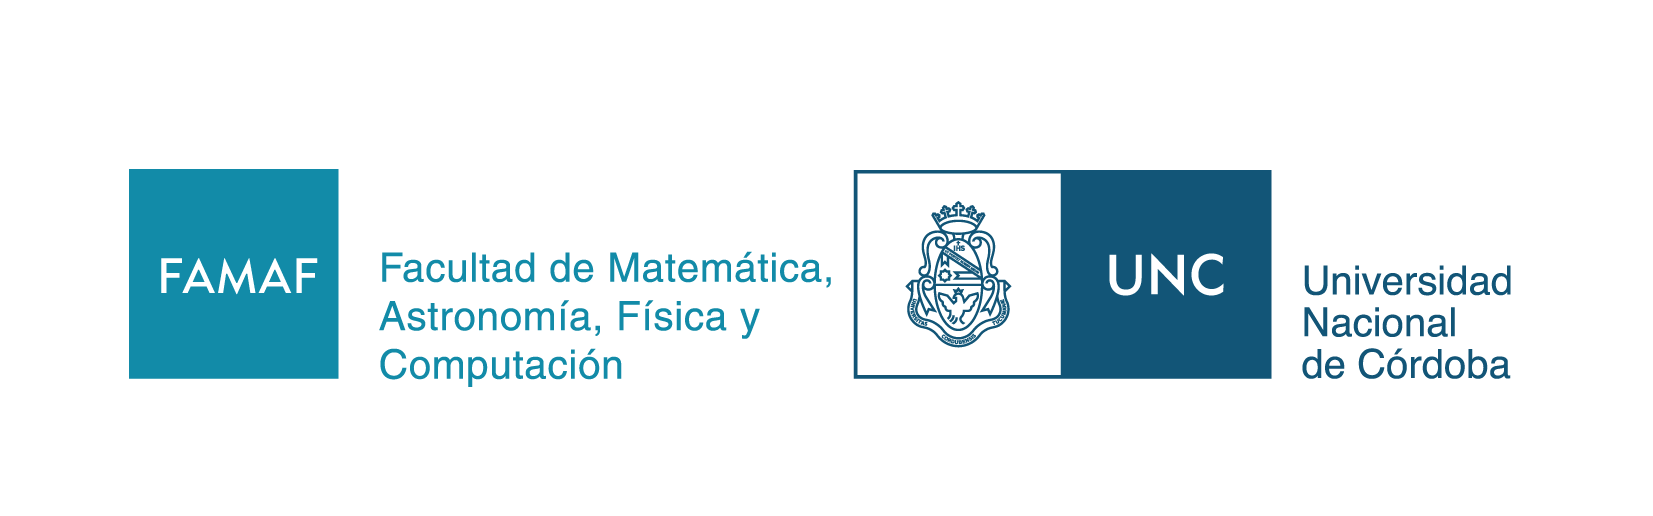
#Optativa Series de Tiempo 2025


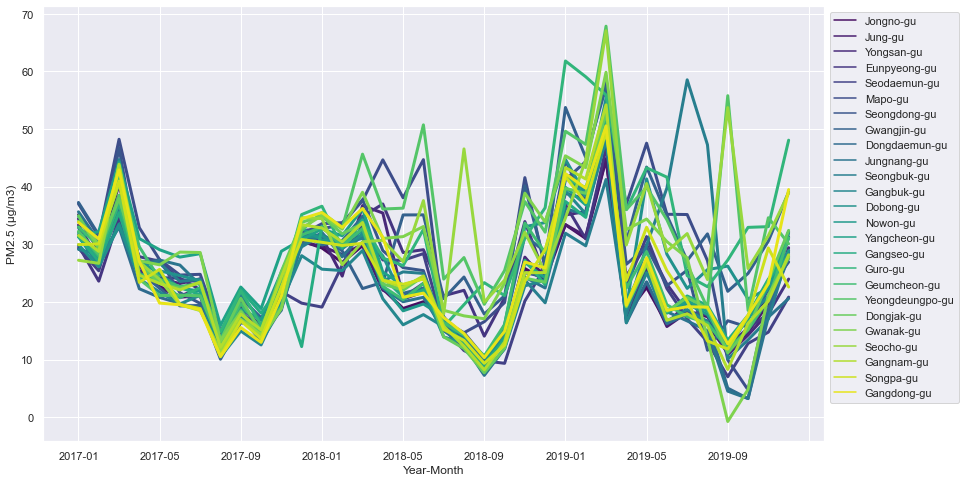

#Exploración de datos de polución con Python

# Introducción
<br>

Una gráfica de series de tiempo con una sola línea es un gráfico útil para expresar datos con secuencias largas. Consta de un eje X que representa la línea de tiempo y un eje Y que muestra el valor. Este es un método estándar ya que el concepto es simple y fácil de entender. El gráfico puede ayudarnos a extraer información valiosa, como tendencias y efectos estacionales.

Sin embargo, muchas curvas en el gráfico de series temporales múltiples pueden dificultar las cosas.

# Datos
<br>

Para trabajar con un ejemplo de caso real, usaré el conjunto de datos Air Pollution in Seoul de Kaggle (enlace). Los datos fueron proporcionados por el Gobierno Metropolitano de Seúl. Se trata de información sobre la contaminación del aire que consiste en SO2, NO2, CO, O3, PM10 y PM2.5 entre 2017 y 2019 de 25 distritos en Seúl, la capital de Corea del Sur.

En esta notebook, las PM2.5 de 25 distritos serán la variable principal trazada como múltiples líneas de series de tiempo. PM2.5 se define como una materia de partículas finas con un diámetro inferior a 2,5 µm. Se considera un tipo de contaminación que provoca efectos en la salud a corto plazo.

Visualizar PM2.5 desde muchos lugares ayuda a comparar cómo la contaminación afecta a la ciudad.

Como se puede ver en la descripción del conjunto de datos, se proporcionan cuatro archivos.

- `Measure_summary.csv` con un resumen de la información
- `Measurement_info.csv` con información sobre los contaminantes
- `Measurement_item_info.csv` con información sobre la estación de medición
- `Measurement_station_info.csv` con información sobre la estación de medición

# Importar datos
<br>

Empecemos importando librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

Leer Measurement_summary.csv con Pandas.

In [3]:
df = pd.read_csv('/content/Measurement_summary.csv')
df.head()

Measurement date  Station code  \
0  2017-01-01 00:00           101   
1  2017-01-01 01:00           101   
2  2017-01-01 02:00           101   
3  2017-01-01 03:00           101   
4  2017-01-01 04:00           101   

                                             Address   Latitude   Longitude  \
0  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
1  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
2  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
3  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
4  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   

     SO2    NO2     O3   CO  PM10  PM2.5  
0  0.004  0.059  0.002  1.2  73.0   57.0  
1  0.004  0.058  0.002  1.2  71.0   59.0  
2  0.004  0.056  0.002  1.2  70.0   59.0  
3  0.004  0.056  0.002  1.2  70.0   58.0  
4  0.003  0.051  0.002  1.2  69.0   61.0

# Explorar datos
<br>



Ahora que ya hemos importado el conjunto de datos, continuemos con la verificación del valor faltante y el tipo de datos de cada columna

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


La buena noticia es que no falta ningún valor. El siguiente paso es comprobar el número de códigos de estación distintos.

In [5]:
df['Station code'].nunique()

25

Hay 25 estaciones en total. Verifique los códigos de la estación.

In [6]:
list_scode = list(set(df['Station code']))

In [7]:
list_add = list(df['Address'])
District = [i.split(', ')[2] for i in list_add]
df['District'] = District

# Preprocesar los datos
<br>

Del 101 al 125, los códigos de estación representan los distritos de Seúl. Personalmente, usar los nombres de los distritos es más conveniente para etiquetar la visualización, ya que es más conveniente para leer. Los nombres se extraerán de la columna "Dirección" para crear la columna "Distrito".

In [8]:
list_district = list(set(District))

Cree una lista con los nombres de los 25 distritos para usarla más adelante.

In [9]:
#create a monthly dataframe
df['Measurement date'] = pd.to_datetime(df['Measurement date'])
df['YM'] = df['Measurement date'].dt.strftime('%Y-%m')
df['Year'] = df['Measurement date'].dt.year
df['Month'] = df['Measurement date'].dt.month
df_monthly = df.groupby(['Station code', 'District', 'YM','Year','Month'])[['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']].mean().reset_index()

df_monthly.head()

Station code   District       YM  Year  Month       SO2       NO2  \
0           101  Jongno-gu  2017-01  2017      1  0.004401  0.037481   
1           101  Jongno-gu  2017-02  2017      2 -0.022152  0.010290   
2           101  Jongno-gu  2017-03  2017      3  0.005015  0.041267   
3           101  Jongno-gu  2017-04  2017      4  0.003308  0.034699   
4           101  Jongno-gu  2017-05  2017      5  0.003461  0.031724   

         O3        CO       PM10      PM2.5  
0  0.014972  0.695968  51.024194  35.118280  
1 -0.008138  0.600000  41.970238  28.857143  
2  0.026862  0.698118  55.146505  40.311828  
3  0.033512  0.598056  50.769444  26.536111  
4  0.039319  0.490591  55.129032  22.680108

# Graficamos

## 1-.Primero un grafico multivariado de líneas.

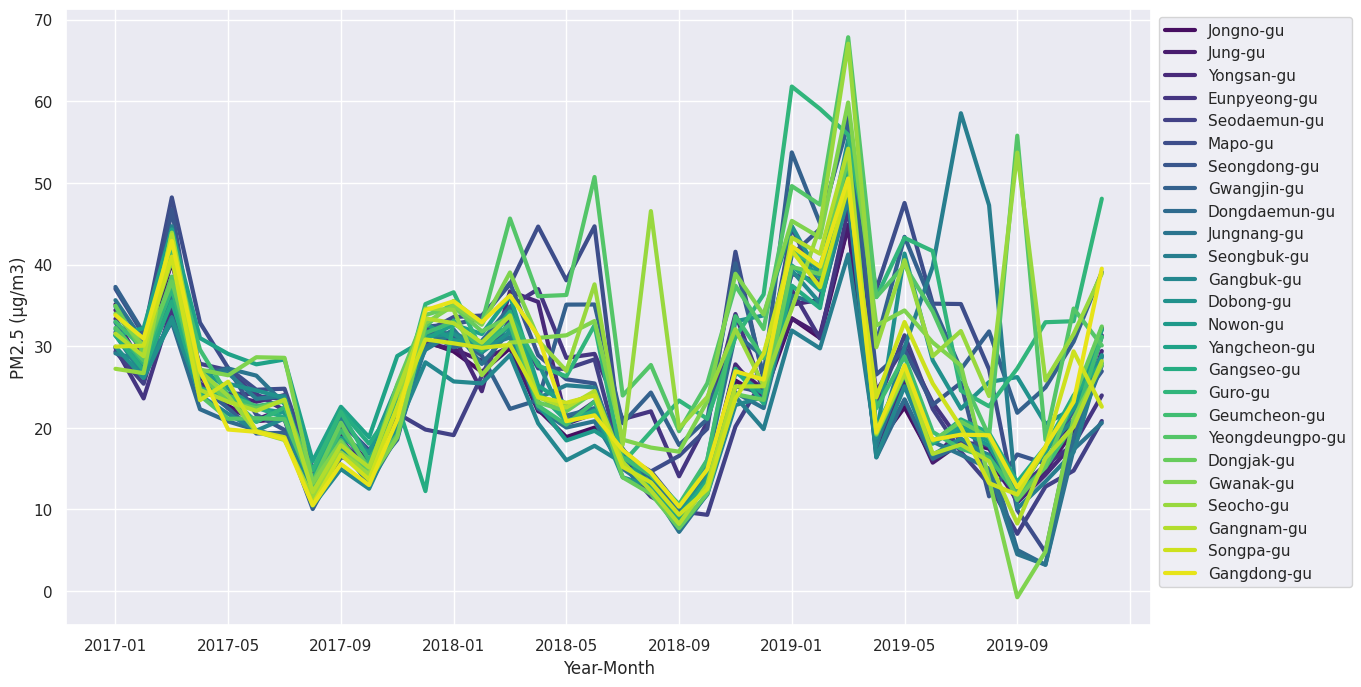

In [10]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_monthly, x ='YM', y = 'PM2.5',
                  hue='District', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('PM2.5 (µg/m3)')
plt.xlabel('Year-Month')
plt.show()

Las líneas superpuestas son difíciles de leer. En 2017, se puede ver que la cantidad de PM2.5 en muchas estaciones fue en la misma dirección. Sin embargo, en 2018 y 2019, las líneas de contaminación fueron arbitrarias y es difícil distinguirlas.

Ideas de visualización
El objetivo principal de este artículo es guiar con algunas ideas de visualización con Python para manejar múltiples datos de series temporales, con énfasis en resolver el problema de los gráficos superpuestos, ya que es un problema principal en el gráfico de múltiples datos de series temporales, como ya hemos visto.

Cada gráfico tiene sus pros y sus contras. Obviamente, nada es perfecto. Algunos pueden ser solo para un efecto llamativo. Pero todos ellos tienen el mismo propósito de comparar secuencias entre categorías.



## 2. Mismo gráfico haciendo interactivo el trazado.

Plotly es una biblioteca gráfica para hacer gráficos interactivos. El gráfico interactivo ayuda a focalizar sobre el área con líneas superpuestas.

In [11]:
import plotly.graph_objects as go

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_scode)).as_hex())

fig = go.Figure()
for d,p in zip(list_district, pal):
    fig.add_trace(go.Scatter(x = df_monthly[df_monthly['District']==d]['YM'],
                             y = df_monthly[df_monthly['District']==d]['PM2.5'],
                             name = d,
                             line_color = p,
                             fill=None))   #tozeroy

fig.show()

## 3- Ahora hacemos un gráfico de area interactivo con  Plotly.

In [12]:
fig = go.Figure()
for d,p in zip(list_district, pal):
    fig.add_trace(go.Scatter(x = df_monthly[df_monthly['District']==d]['YM'],
                             y = df_monthly[df_monthly['District']==d]['PM2.5'],
                             name = d,
                             line_color = p,
                             fill='tozeroy'))   #tozeroy

fig.show()

## 4. Comparando uno a uno con Small Multiple Time Series.

Con la biblioteca Seaborn, podemos hacer pequeñas series temporales múltiples. La idea detrás de estos gráficos es trazar cada línea una por una mientras las compara con la silueta de las otras líneas.

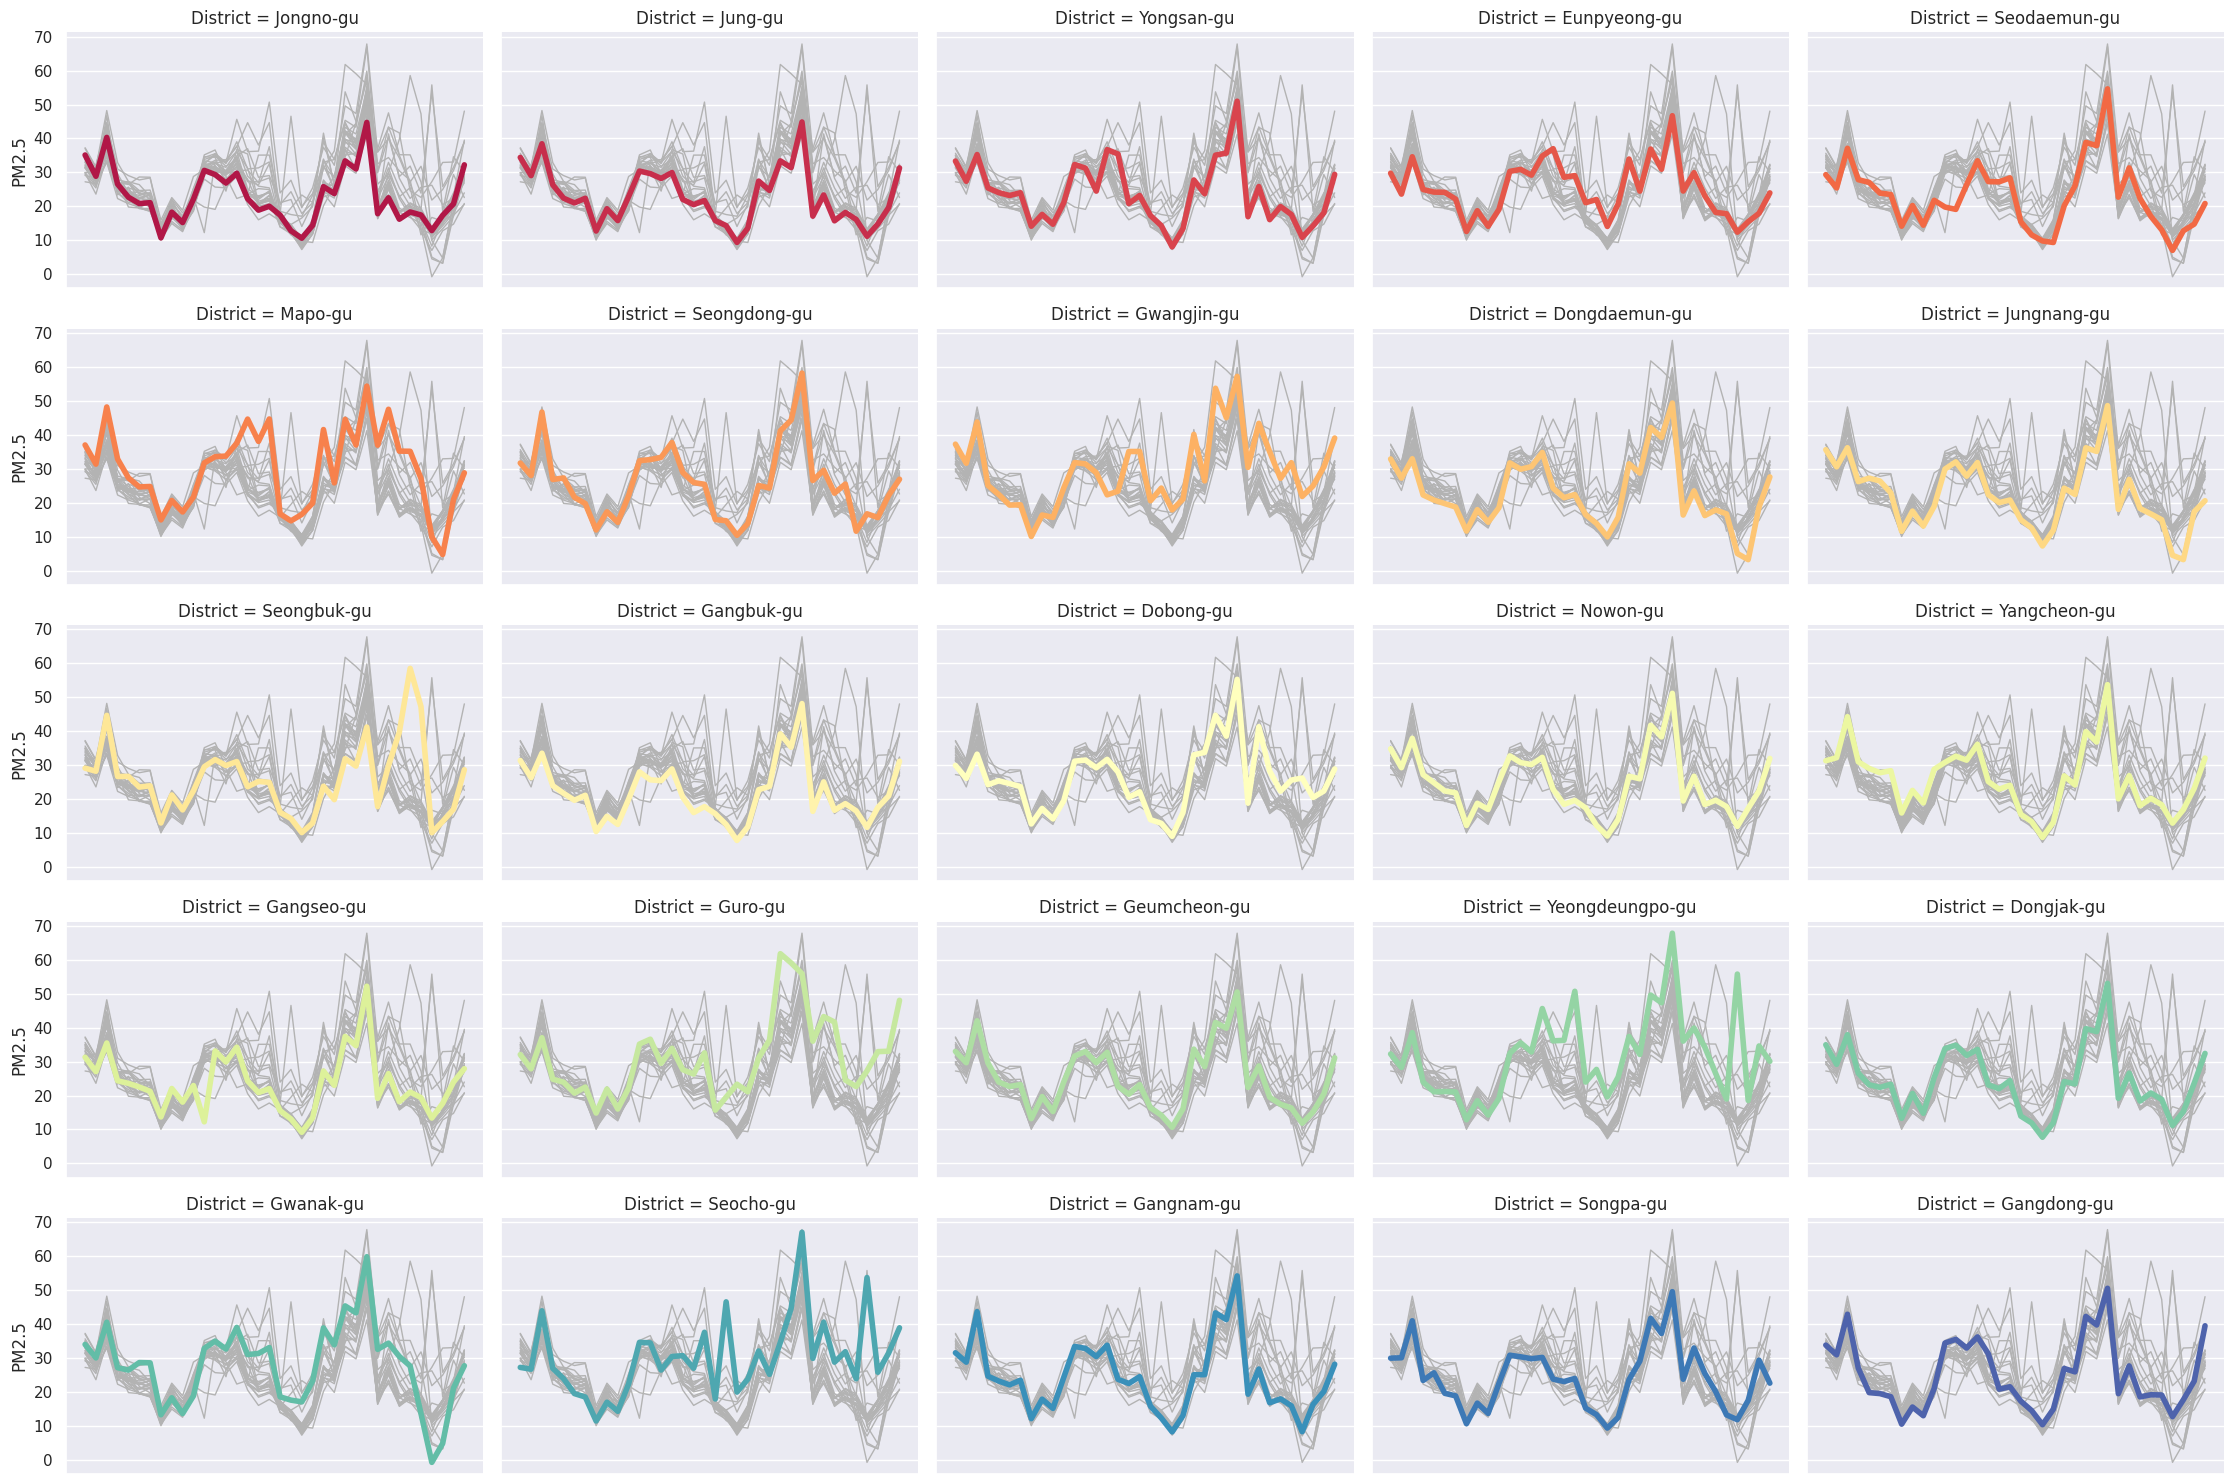

In [13]:
g = sns.relplot(data = df_monthly, x = "YM", y = "PM2.5",
                col = "District", hue = "District",
                kind = "line", palette = "Spectral",
                linewidth = 4, zorder = 5,
                col_wrap = 5, height = 3, aspect = 1.5, legend = False
               )

#add silhouettes
for ax in g.axes.flat:
    sns.lineplot(data = df_monthly, x = "YM", y = "PM2.5", units="District",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )

ax.set_xticks([])
g.set_titles(None)
g.set_axis_labels("", "PM2.5")
g.tight_layout()

## Cambiar el punto de vista con Facet Grid

FacetGrid de Seaborn se puede utilizar para crear cuadrículas de varias parcelas. En este caso, los atributos 'Mes' y 'Año' se configuran como filas y columnas, respectivamente. Desde otra perspectiva, los valores se pueden comparar simultáneamente mensualmente en vertical y anualmente en horizontal.

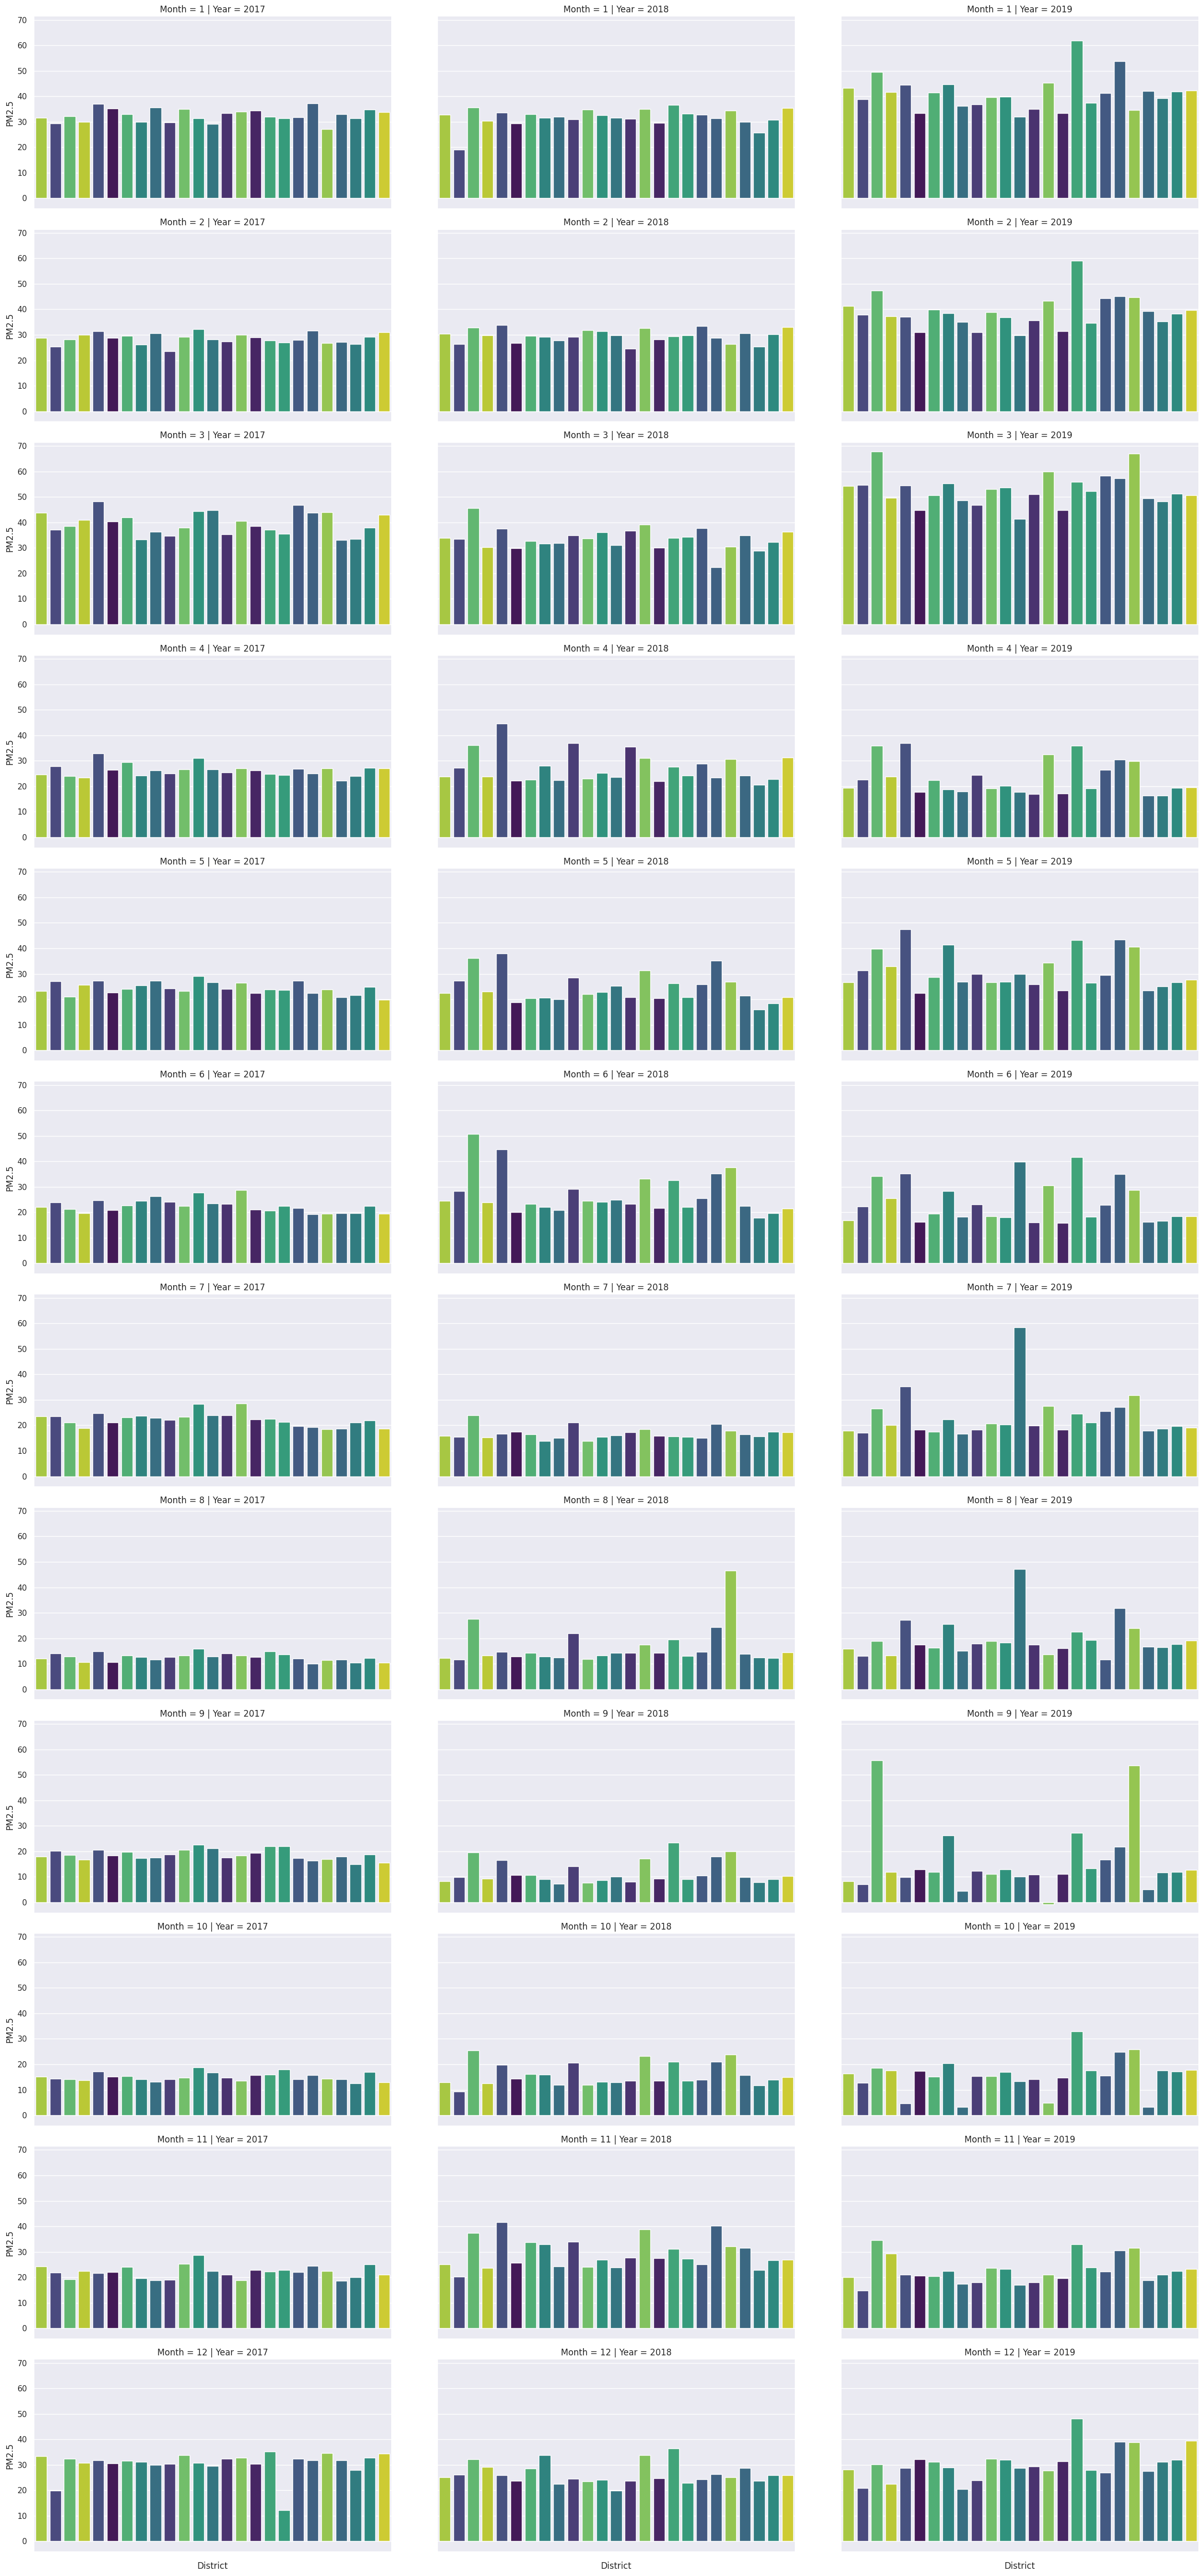

In [14]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})
g = sns.FacetGrid(df_monthly, col="Year", row="Month", hue="District", palette='viridis', height=4.2, aspect=1.9)
g = g.map(sns.barplot, 'District', 'PM2.5', errorbar=None, order = list_district, legend=False)

g.set_xticklabels(rotation = 90)
plt.show()


## Usar color con un Heat Map

Un mapa de calor representa los datos en un gráfico bidimensional que muestra los valores en colores. Para manejar los datos de la serie temporal, podemos configurar los grupos en la vertical y la línea de tiempo en las dimensiones horizontales. La diferencia de color ayuda a distinguir entre grupos.

In [20]:
df_pivot = pd.pivot_table(df_monthly,
                          values='PM2.5',
                          index='District',
                          columns='YM')
df_pivot

YM                 2017-01    2017-02    2017-03    2017-04    2017-05  \
District                                                                 
Dobong-gu        29.938172  26.101190  33.245968  24.245833  25.389785   
Dongdaemun-gu    32.892473  27.238095  32.967742  22.276389  20.774194   
Dongjak-gu       34.952957  29.187500  37.931452  26.590278  23.169355   
Eunpyeong-gu     29.771505  23.595238  34.607527  24.941667  24.189516   
Gangbuk-gu       31.387097  26.311012  33.530914  23.969444  21.713710   
Gangdong-gu      33.797043  30.922619  42.892473  27.000000  19.787634   
Gangnam-gu       31.529570  28.763393  43.662634  24.643056  23.193548   
Gangseo-gu       31.284946  27.037202  35.482527  24.338889  23.581989   
Geumcheon-gu     33.009409  29.656250  42.028226  29.568056  23.959677   
Guro-gu          32.073925  27.866071  37.030914  24.809722  23.934140   
Gwanak-gu        33.987903  30.019345  40.537634  27.131944  26.430108   
Gwangjin-gu      37.256720  31.625000  43.793011  25.106944  22.399194   
Jongno-gu        35.118280  28.857143  40.311828  26.536111  22.680108   
Jung-gu          34.412634  29.040179  38.438172  26.338889  22.388441   
Jungnang-gu      35.631720  30.569940  36.215054  26.213889  27.256720   
Mapo-gu          37.018817  31.367560  48.217742  32.873611  27.326613   
Nowon-gu         34.849462  29.255952  37.908602  27.211111  24.817204   
Seocho-gu        27.225806  26.691964  43.901882  26.954167  23.889785   
Seodaemun-gu     29.327957  25.398810  37.103495  27.843056  27.051075   
Seongbuk-gu      29.119624  28.212798  44.689516  26.654167  26.701613   
Seongdong-gu     31.702957  28.007440  46.716398  26.840278  27.298387   
Songpa-gu        29.946237  30.062500  40.967742  23.377778  25.647849   
Yangcheon-gu     31.306452  32.212798  44.301075  30.987500  29.048387   
Yeongdeungpo-gu  32.244624  28.255952  38.521505  23.958333  21.095430   
Yongsan-gu       33.338710  27.373512  35.255376  25.413889  24.024194   

YM                 2017-06    2017-07    2017-08    2017-09    2017-10  ...  \
District                                                                ...   
Dobong-gu        24.570833  23.674731  12.673387  17.268056  14.159946  ...   
Dongdaemun-gu    19.733333  18.737903  11.646505  17.954167  14.250000  ...   
Dongjak-gu       22.398611  23.310484  13.271505  20.622222  14.750000  ...   
Eunpyeong-gu     24.125000  22.129032  12.572581  18.712500  14.106183  ...   
Gangbuk-gu       19.647222  21.142473  10.440860  14.944444  12.534946  ...   
Gangdong-gu      19.504167  18.595430  10.498656  15.556944  12.981183  ...   
Gangnam-gu       22.076389  23.450269  12.126344  17.863889  15.145161  ...   
Gangseo-gu       22.508333  21.232527  13.684140  22.069444  18.051075  ...   
Geumcheon-gu     22.655556  23.217742  13.178763  19.681944  15.272849  ...   
Guro-gu          20.711111  22.491935  14.822581  21.916667  16.013441  ...   
Gwanak-gu        28.643056  28.569892  13.268817  18.269444  13.620968  ...   
Gwangjin-gu      19.297222  19.384409  10.048387  16.383333  15.676075  ...   
Jongno-gu        20.816667  21.071237  10.704301  18.275000  15.213710  ...   
Jung-gu          21.002778  22.373656  12.717742  19.286111  15.797043  ...   
Jungnang-gu      26.390278  22.908602  11.575269  17.533333  13.108871  ...   
Mapo-gu          24.658333  24.786290  14.928763  20.665278  17.256720  ...   
Nowon-gu         22.395833  21.856183  12.235215  18.780556  16.955645  ...   
Seocho-gu        19.502778  18.497312  11.432796  16.975000  14.286290  ...   
Seodaemun-gu     23.875000  23.504032  14.131720  20.243056  14.430108  ...   
Seongbuk-gu      23.544444  23.923387  12.962366  21.236111  16.818548  ...   
Seongdong-gu     21.600000  19.731183  11.971774  17.331944  14.202957  ...   
Songpa-gu        19.581944  18.838710  10.614247  16.698611  13.657258  ...   
Yangcheon-gu     27.773611  28.364247  15.911290  22.575000  18.842742  ...   
Yeongdeungpo-gu  21.173611

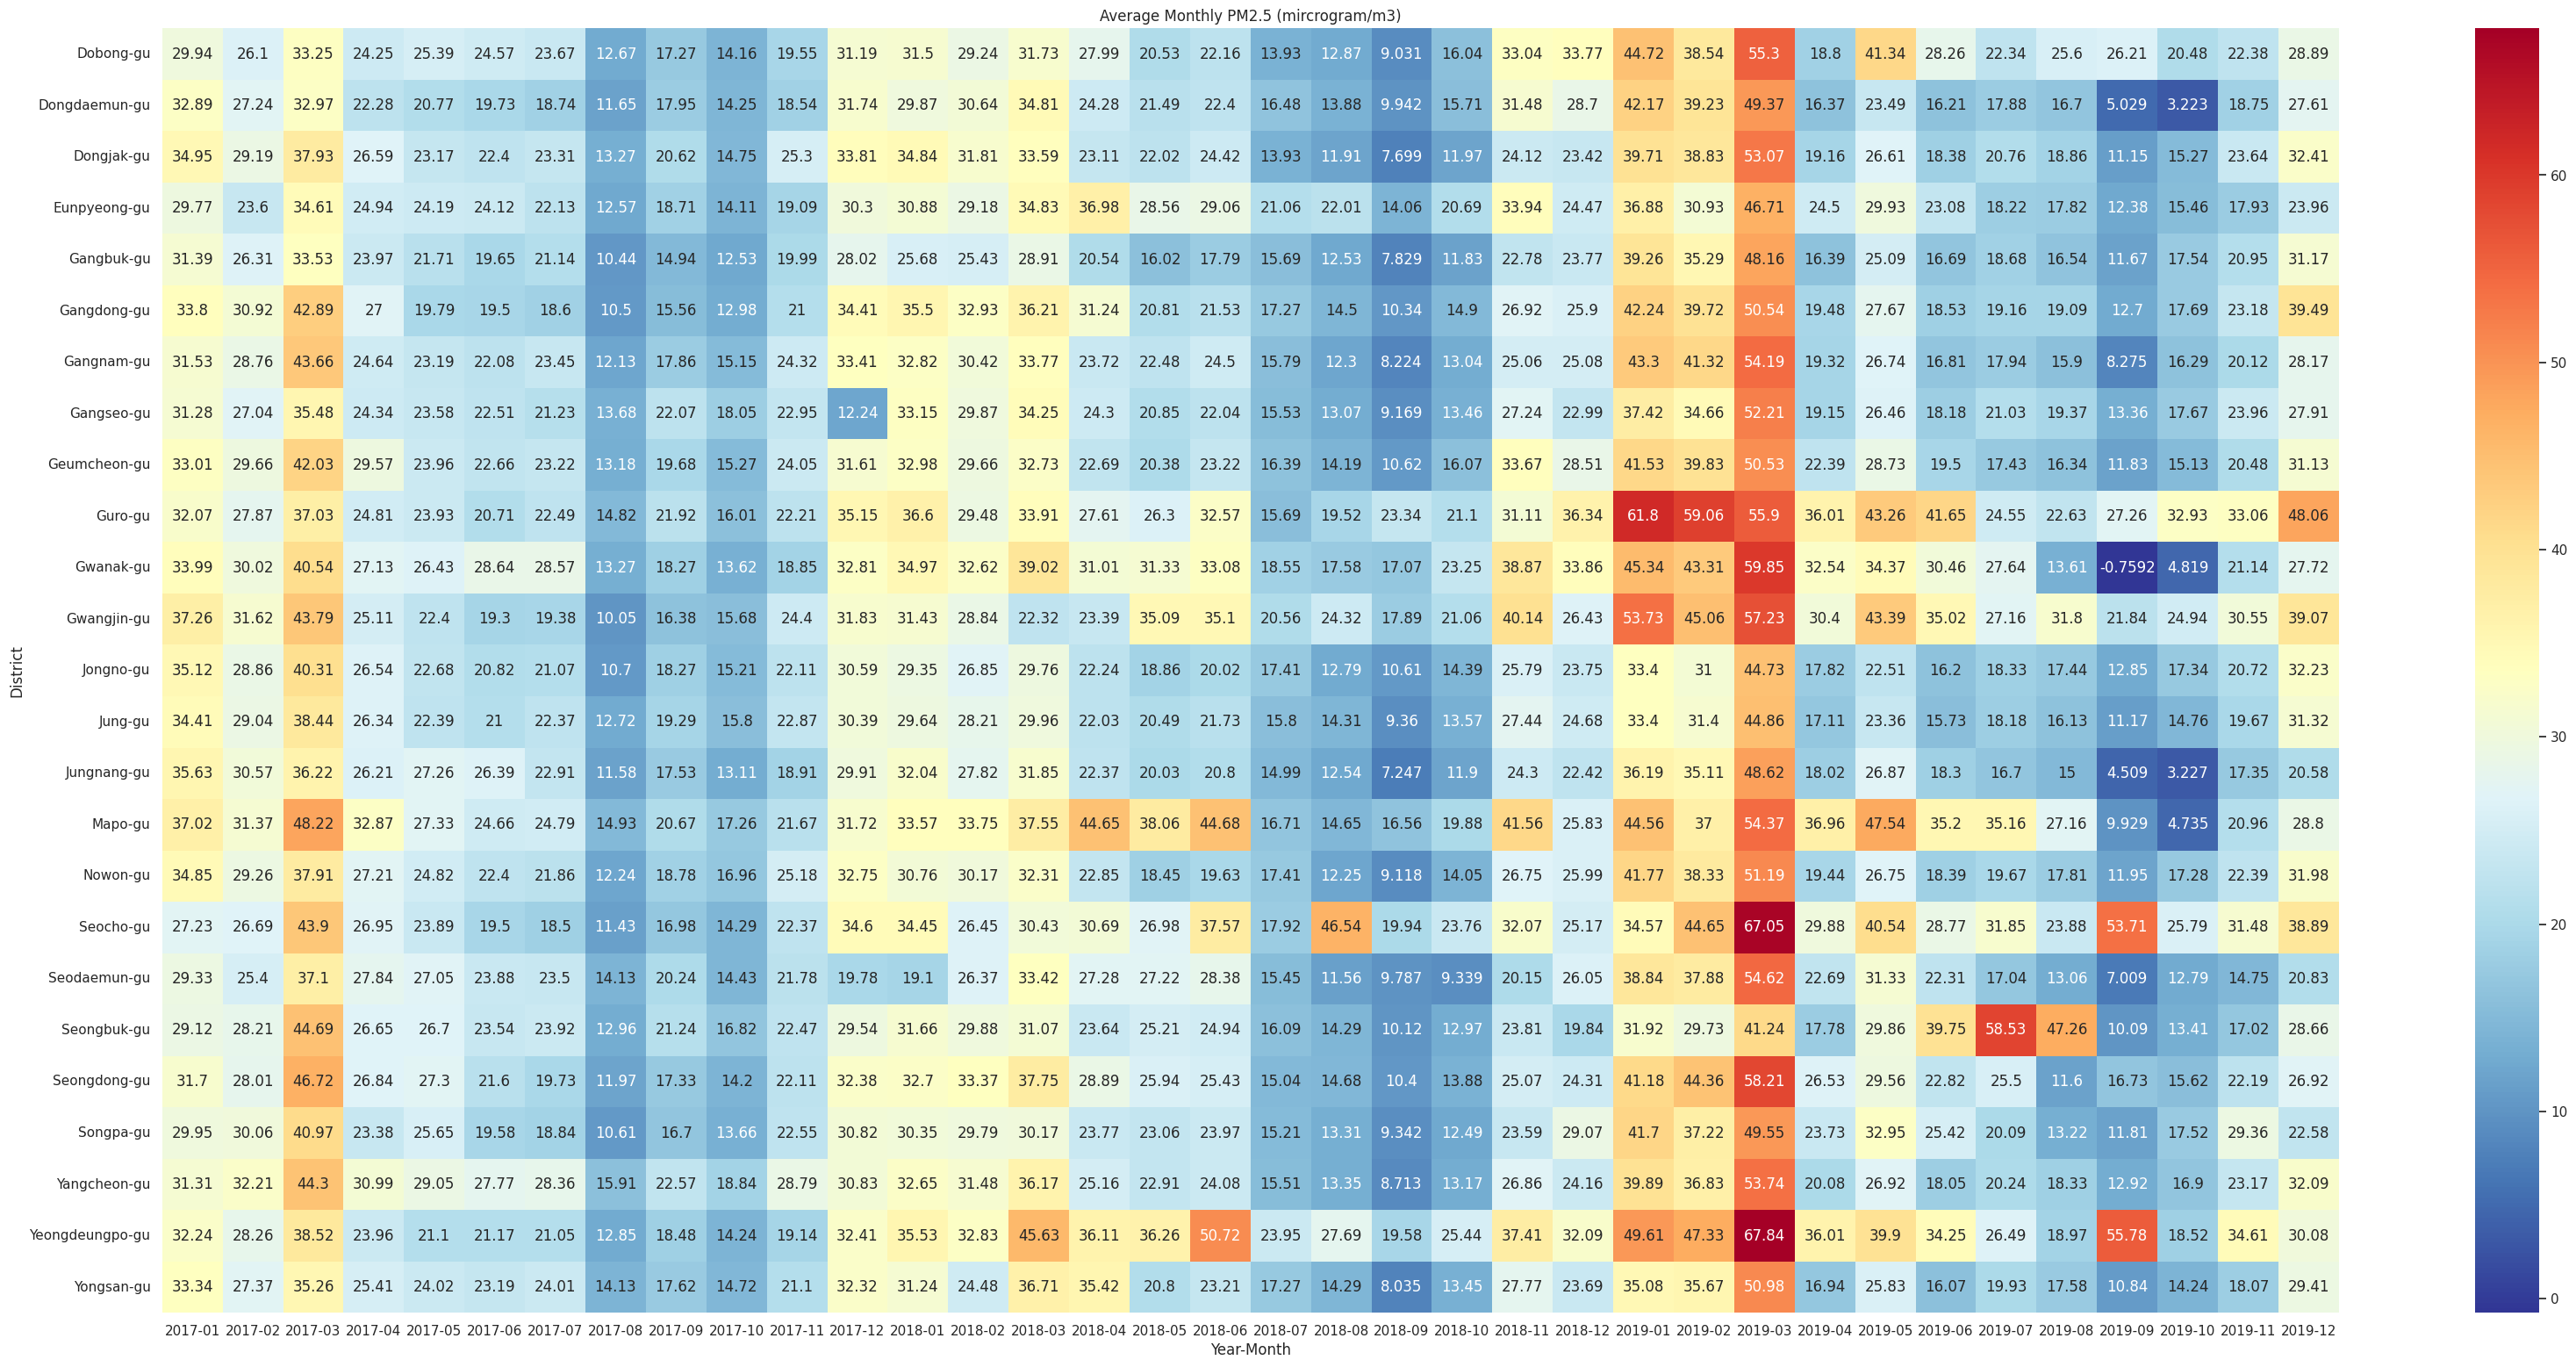

In [21]:

plt.figure(figsize = (40,19))
plt.title('Average Monthly PM2.5 (mircrogram/m3)')

sns.heatmap(df_pivot, annot=True, cmap='RdYlBu_r', fmt= '.4g',)
plt.xlabel('Year-Month')
plt.ylabel('District')
plt.show()



## Aplicación de ángulos con un gráfico de radar

Podemos establecer el eje angular en el diagrama de dispersión en Plotly para crear un gráfico de radar interactivo. Cada mes se seleccionará como una variable en el círculo. Por ejemplo, en este ejemplo, crearemos un gráfico de radar que compare el promedio mensual de PM2.5 de los 25 distritos en 2019.

Filtre el DataFrame con solo datos de 2019

In [22]:
df_19 = df_monthly[df_monthly['Year']==2019].copy()

In [23]:
import plotly.graph_objects as go

#extract color palette, the palette name can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_district)).as_hex())

months_order = [i for i in range(1, 13)] # Use integer months for easier indexing/ordering
list_PM = []

for district in list_district:
    district_data = df_19[df_19['District'] == district].sort_values(by='Month')
    pm_values = [district_data[district_data['Month'] == month]['PM2.5'].iloc[0] if not district_data[district_data['Month'] == month].empty else None for month in months_order]
    list_PM.append(pm_values)

fig = go.Figure()
for pm,d,c in zip(list_PM, list_district, pal):
    fig.add_trace(go.Scatterpolar(r = pm, theta=[str(m) for m in months_order], fill= None,
                                  name=str(d), marker = dict(color = c)))

fig.update_layout(polar = dict(radialaxis = dict(visible = True, range=[0, 70]),
                               angularaxis = dict(rotation=90)),
                  showlegend=True, width=720, height=720,
                  font = dict(size=14))

fig.show()

Vayamos más allá llenando el área de radar de cada uno de los distritos, de a uno y comparando cada uno con el resto. Luego crea un collage de fotos.

In [35]:
keep_figname = []
for i in list_district:
    fig = go.Figure()
    for d, pm, c in zip(list_district, list_PM, pal):

        # fill radar chart by name of district
        if i == d:
            fig.add_trace(go.Scatterpolar(r = pm, theta=[str(m) for m in months_order], fill='toself',
                                          name=str(d), marker = dict(color = c)))
        else:
            fig.add_trace(go.Scatterpolar(r = pm, theta=[str(m) for m in months_order], fill= None,
                                          name=str(d), marker = dict(color = c)))
    #update layout
    fig.update_layout(polar = dict(radialaxis = dict(visible = True, range=[0, 70]),
                                   angularaxis = dict(rotation=90)),
                      showlegend = True, width = 720, height = 720,
                      font = dict(size = 14), title = i, title_x = 0.5)

    keep_figname.append('radar_'+ i + '.png')
    plt.savefig('radar_'+ str(i) + '.png')   #export_fig

    fig.show()


<Figure size 1400x800 with 0 Axes>

Defina una función para crear un collage de fotos.

In [36]:
from PIL import Image
def get_collage(cols_n, rows_n, width, height, input_sname, save_name):
    c_width = width//cols_n
    c_height = height//rows_n
    size = c_width, c_height
    new_im = Image.new('RGB', (width, height))
    ims = []
    for p in input_sname:
        im = Image.open(p)
        im.thumbnail(size)
        ims.append(im)
    i, x, y = 0,0,0
    for col in range(cols_n):
        for row in range(rows_n):
            print(i, x, y)
            new_im.paste(ims[i], (x, y))
            i += 1
            y += c_height
        x += c_width
        y = 0
    new_im.save(save_name)

Use the function

In [37]:
# to create a fit photo collage:
# width = number of columns * figure size // height = number of rows * figure size

get_collage(5, 5, 3600, 3600, keep_figname, 'Collage_radar.jpg')

0 0 0
1 0 720
2 0 1440
3 0 2160
4 0 2880
5 720 0
6 720 720
7 720 1440
8 720 2160
9 720 2880
10 1440 0
11 1440 720
12 1440 1440
13 1440 2160
14 1440 2880
15 2160 0
16 2160 720
17 2160 1440
18 2160 2160
19 2160 2880
20 2880 0
21 2880 720
22 2880 1440
23 2880 2160
24 2880 2880


## Veamos el diagrama de barras con Circular Bar Plot (Race Track Plot)

El concepto de una Gráfica de Barra Circular (también conocida como Gráfica de Pista de Carrera) es tan simple porque son solo gráficas de barra en un círculo. Podemos graficar Circular Bar Plot mensualmente y luego hacer un collage de fotos para comparar el proceso a lo largo del tiempo. La desventaja de este gráfico es que es difícil comparar entre categorías. Por cierto, es una buena opción para llamar la atención con un efecto llamativo.

Definir una función para crear un diagrama de barra circular

In [38]:
max_val = max(df_19['PM2.5'])*1.001        #set max value
pal = list(sns.color_palette(palette='YlOrRd', n_colors=len(list_district)).as_hex())

def circular_bar(input_df, column_name, title):
    plt.gcf().set_size_inches(12, 12)
    ax = plt.subplot(projection='polar')
    input_df.reset_index(inplace=True, drop=True)
    for i in range(len(input_df)):
        ax.barh(i, input_df[column_name][i]*2*np.pi/max_val, label=input_df['District'][i], color=pal[i])

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(1)
    ax.set_rlabel_position(0)
    ax.set_thetagrids([], labels=[])
    ax.set_rgrids(range(len(input_df)), labels= input_df['District'])

    ax = plt.subplot(projection='polar')
    plt.title("Average PM2.5 // " + title)
    return ax

In [39]:
list_month19 = list(set(df_19['Month']))
list_YM19 = list(set(df_19['YM']))
list_YM19.sort()
listdf_monthly19 = [df_19[df_19['Month']==i] for i in list_month19]

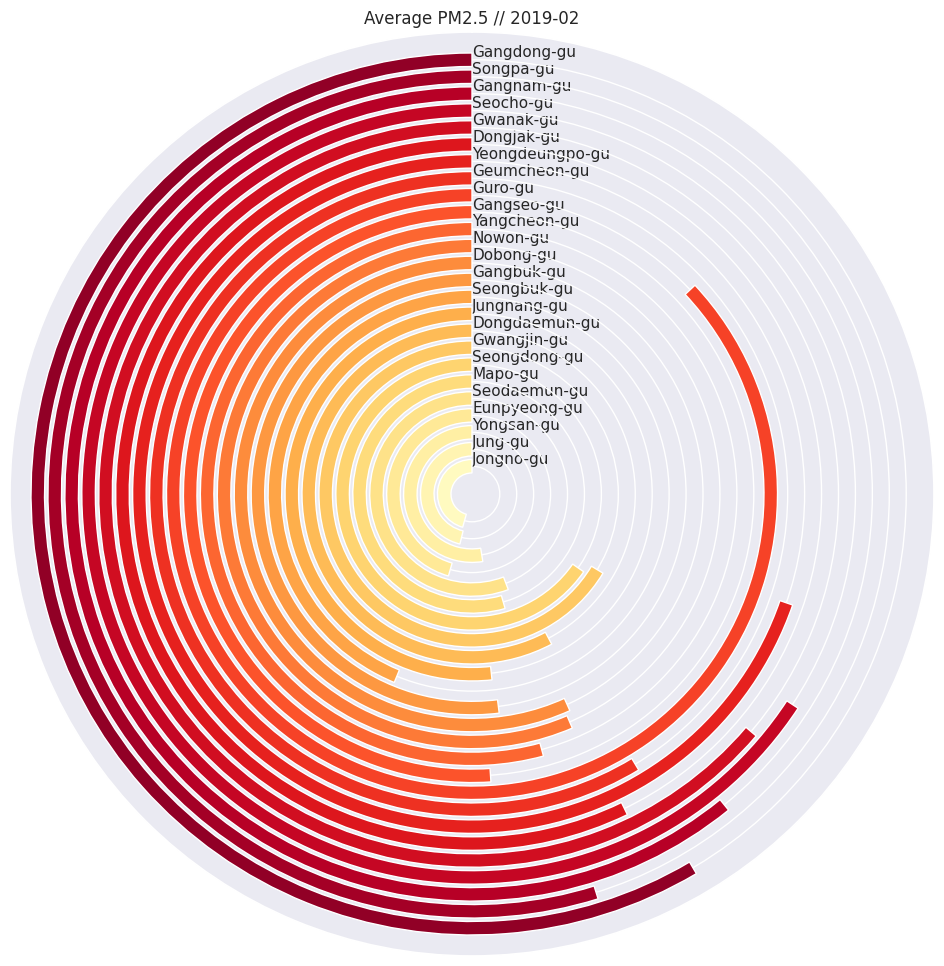

In [28]:
circular_bar(listdf_monthly19[1],'PM2.5', list_YM19[1])
plt.show()

Aplicar la funcion

In [29]:


keep_sname = []
order = range(len(listdf_monthly19))
for i in order:
    circular_bar(listdf_monthly19[i],'PM2.5', list_YM19[i])
    keep_sname.append('cir_bar_' + str(i) + '.png')
    plt.savefig('cir_bar_' + str(i) + '.png')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

Crear el collage

In [33]:
# to create a fit photo collage:
# width = number of columns * figure size // height = number of rows * figure size

get_collage(3, 4, 2592, 3456, keep_sname, 'Collage_cir_bar.jpg')

0 0 0
1 0 864
2 0 1728
3 0 2592
4 864 0
5 864 864
6 864 1728
7 864 2592
8 1728 0
9 1728 864
10 1728 1728
11 1728 2592



##  Comenzando desde el centro con Radial Plot

Al igual que el gráfico de barras circular, el gráfico radial se basa en gráficos de barras que utilizan coordenadas polares en lugar de coordenadas cartesianas. Este tipo de gráfico es inconveniente cuando se comparan categorías ubicadas lejos unas de otras, pero es una excelente opción para llamar la atención. Se puede utilizar en infografías.



In [40]:
#set color palette, lower and max values
pal = list(sns.color_palette(palette='CMRmap_r', n_colors=len(list_district)).as_hex())
lowerLimit = 0
max_v = df_19['PM2.5'].max()

def radial_plot(input_df, column_name, title):
    input_df.reset_index(inplace=True, drop=True)
    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)
    plt.axis()

    heights = input_df[column_name]
    width = 2*np.pi / len(input_df.index)

    indexes = list(range(1, len(input_df.index)+1))
    angles = [element * width for element in indexes]

    bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
                  linewidth=1, edgecolor="white", color=pal)

    labelPadding = 2

    for bar, angle, height, label in zip(bars, angles, heights, list_district):
        rotation = np.rad2deg(angle)
        alignment = ""

        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else:
            alignment = "left"

        ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
                s=label, ha=alignment, va='center', rotation=rotation,
                rotation_mode="anchor")

        ax.set_thetagrids([], labels=[])
        plt.title("Average PM2.5 // " + title)
    return ax

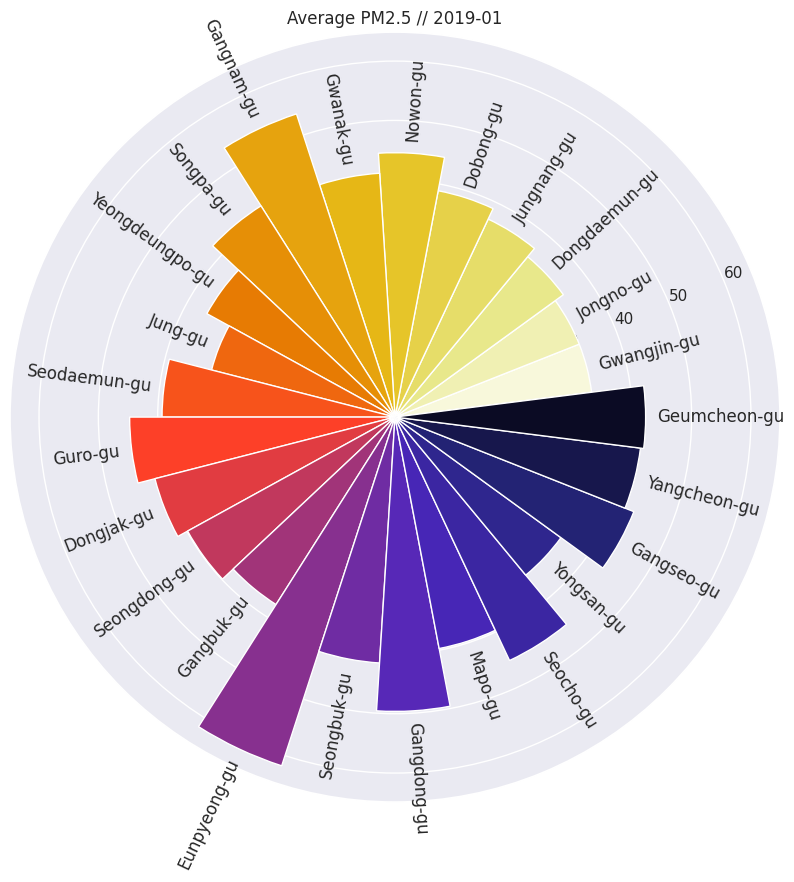

In [ ]:
radial_plot(listdf_monthly19[0], 'PM2.5', list_YM19[0])
plt.show()

Aplicar la funcion

In [41]:
keep_sname = []
order = range(len(listdf_monthly19))

for i in order:
    radial_plot(listdf_monthly19[i], 'PM2.5', list_YM19[i])
    keep_sname.append('rad_bar_' + str(i) + '.png')
    plt.savefig('rad_bar_' + str(i) + '.png')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

Photo collage necesita descomentar las lineas de grabado de imagenes

In [44]:
# to create a fit photo collage:
#width = number of columns * figure size // height = number of rows * figure size

get_collage(3, 4, 2592, 3456, keep_sname, 'Collage_rad_bar.png')

0 0 0
1 0 864
2 0 1728
3 0 2592
4 864 0
5 864 864
6 864 1728
7 864 2592
8 1728 0
9 1728 864
10 1728 1728
11 1728 2592


##  Mostrando densidades superpuestas (Gráfico de cresta)

Las densidades superpuestas (Gráfico de cresta) se pueden usar con múltiples datos de series de tiempo configurando un eje como una línea de tiempo. Al igual que el diagrama de barra circular y el diagrama radial, el diagrama de cresta puede llamar la atención de las personas.

La siguiente imagen muestra un ejemplo del gráfico Ridge con las densidades de PM2.5 en un distrito en 2019.

Defina una función para crear el gráfico Ridge



In [49]:
#change color scale for 12 months
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_month19)).as_hex())

def kde_ridge(df_input, col_name, time, title):
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    # Initialize the FacetGrid object
    g = sns.FacetGrid(df_input, row= time, hue=time, aspect=15, height=0.65, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, col_name,
          bw_adjust=.5, clip_on=False,fill=True, alpha=1, linewidth=1.5)

    g.map(sns.kdeplot, col_name, clip_on=False, color="w", lw=2, bw_adjust=.5)

    # passing color=None to refline() uses the hue mapping
    g.map(plt.axhline, y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,ha="left", va="center", transform=ax.transAxes)

    g.map(label, time)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="", xlabel= title + ' PM2.5')
    g.despine(bottom=True, left=True)

    return g

In [50]:
#use hourly data
df_hour19 = df[df['Year']==2019]
df_hd19 = [df_hour19[df_hour19['District']==i] for i in list_district]

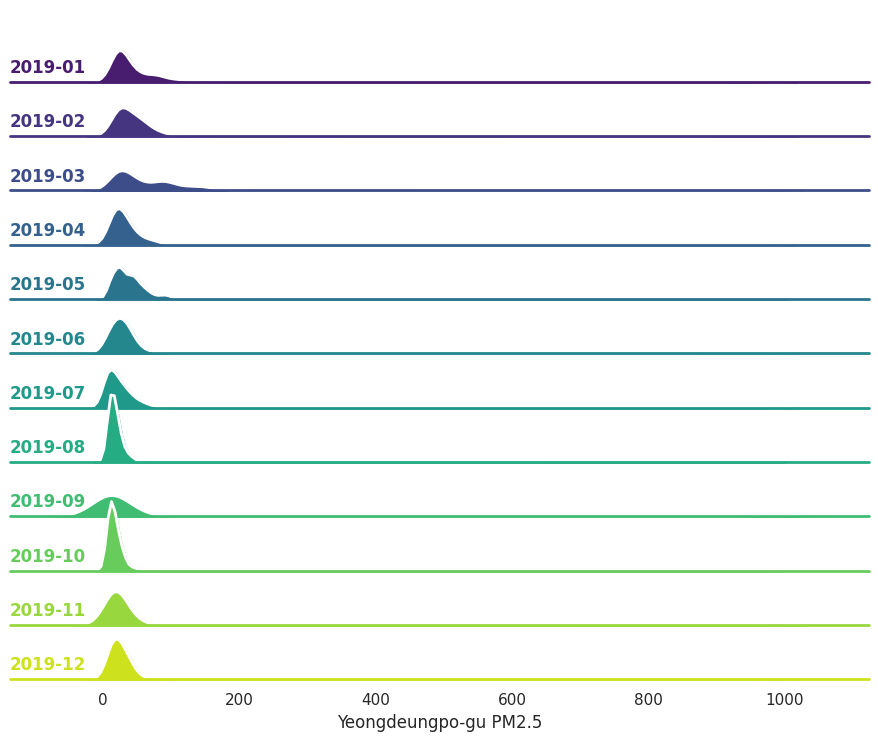

In [51]:
kde_ridge(df_hd19[2], 'PM2.5', 'YM', list_district[2])

Apliquemos la funcion

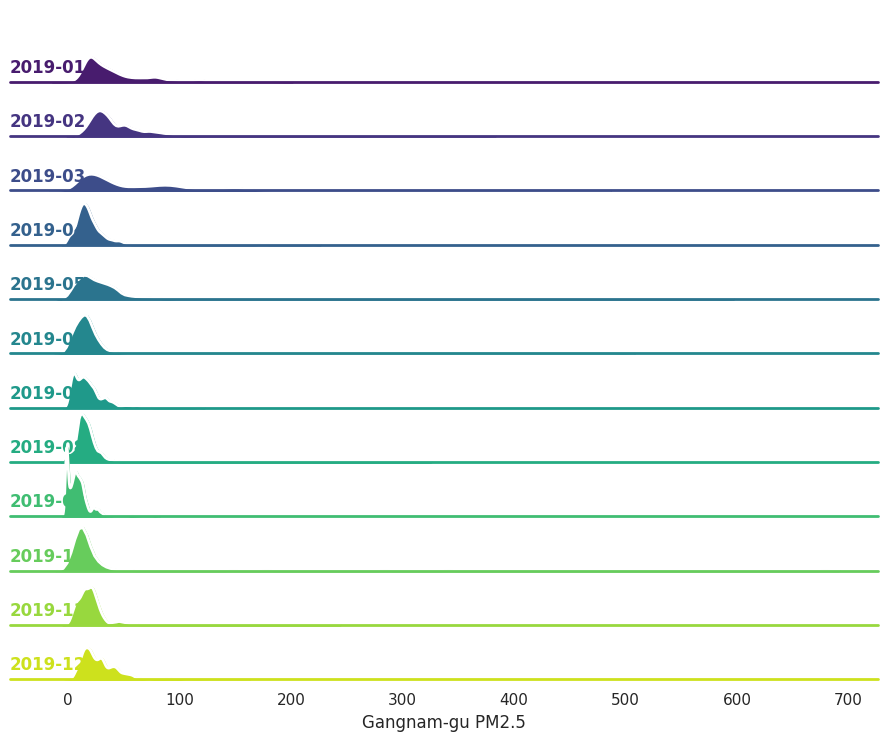

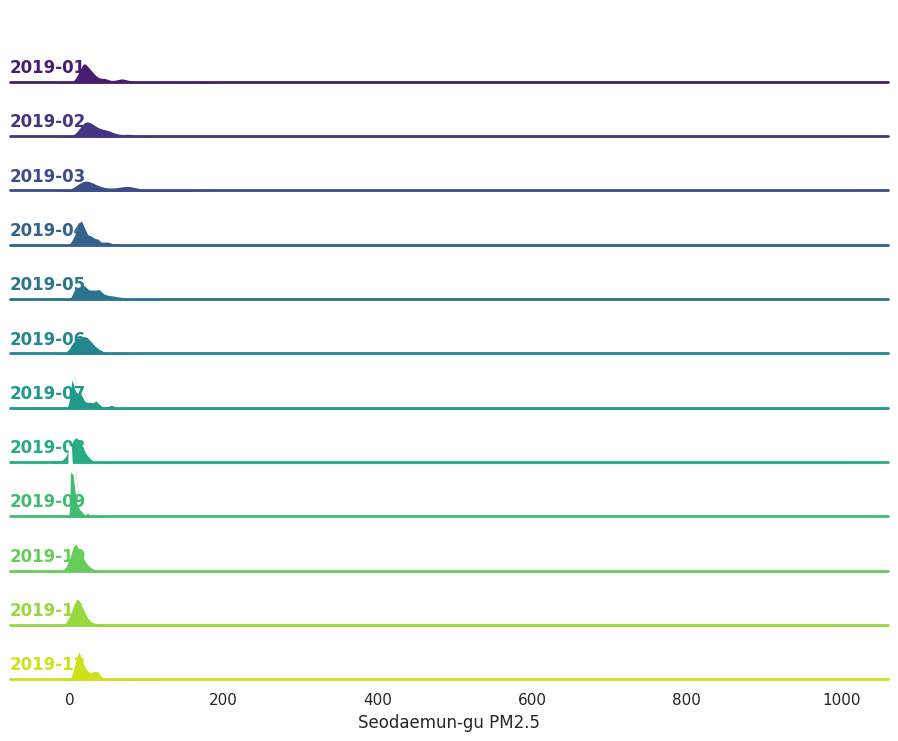

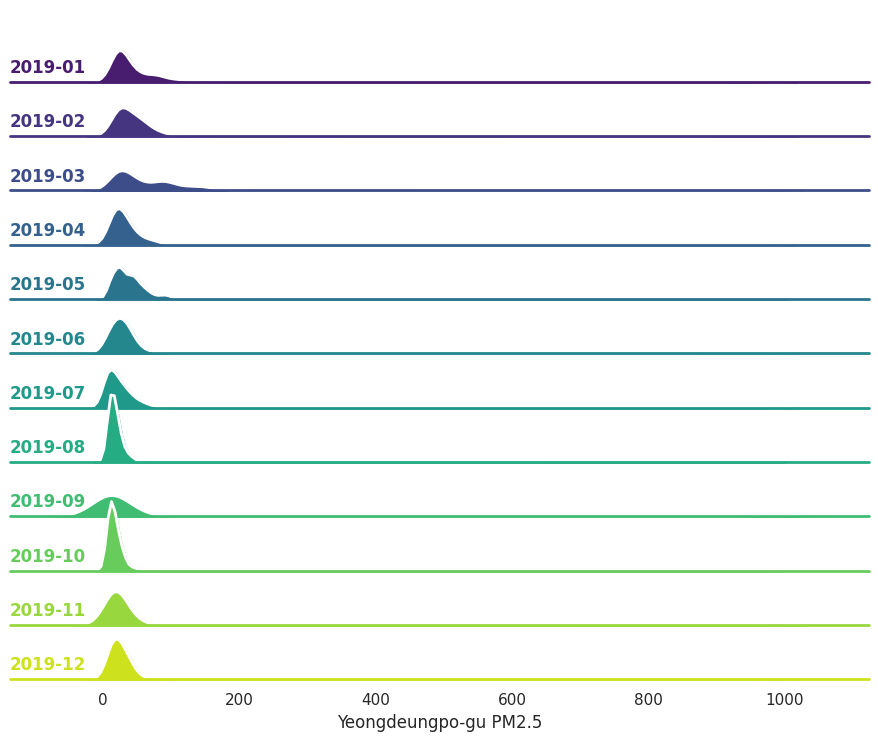

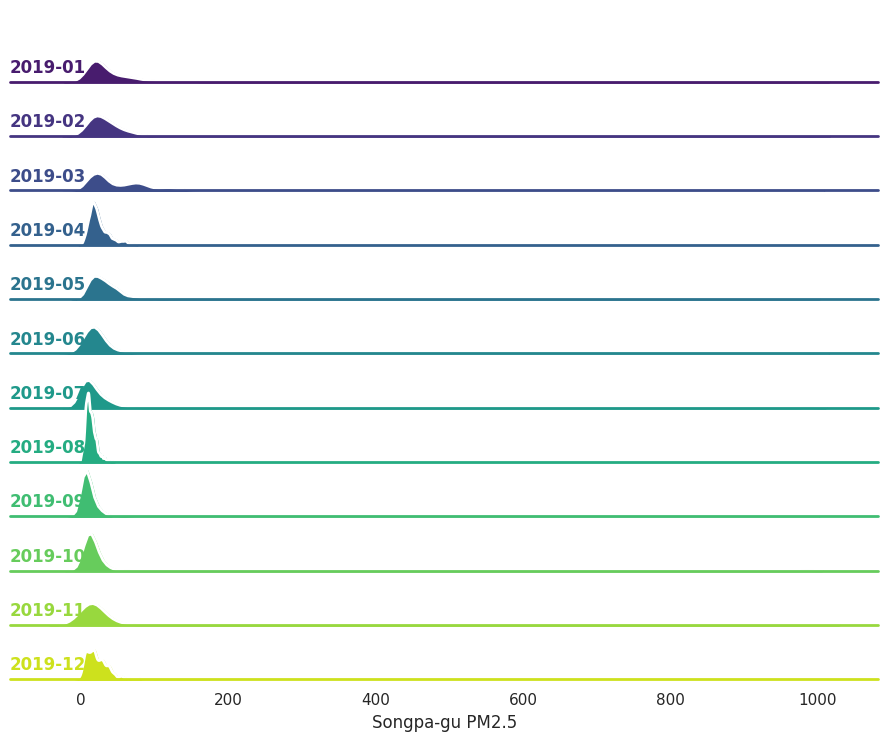

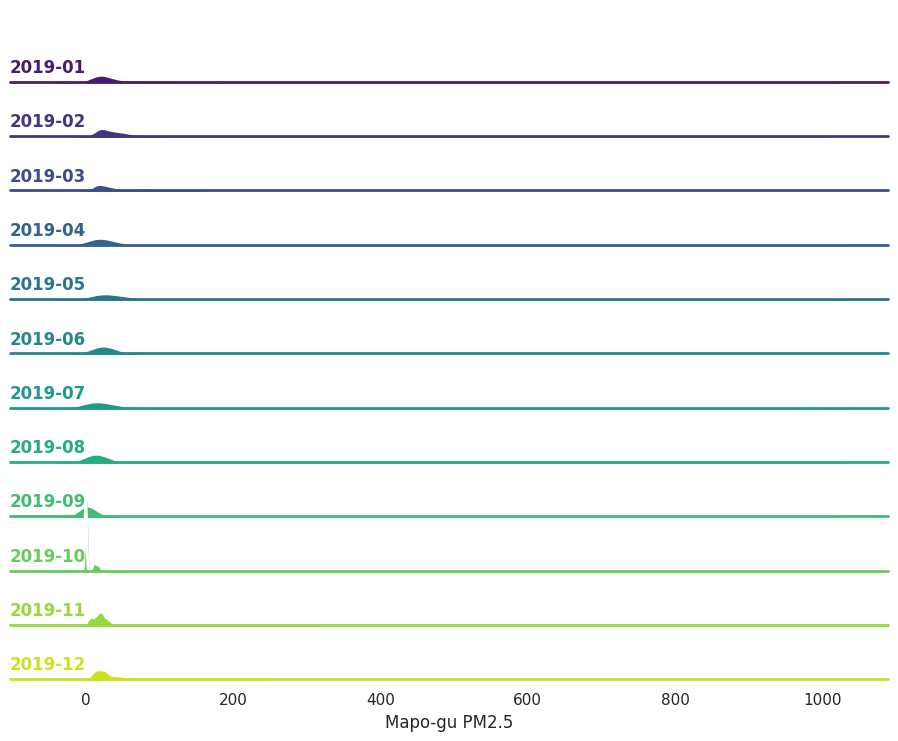

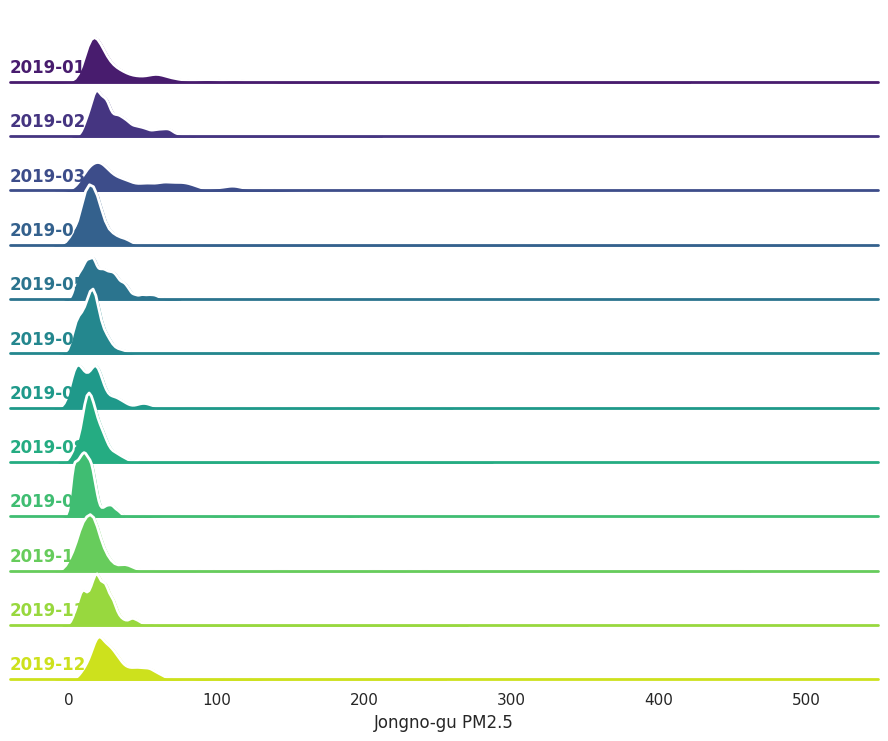

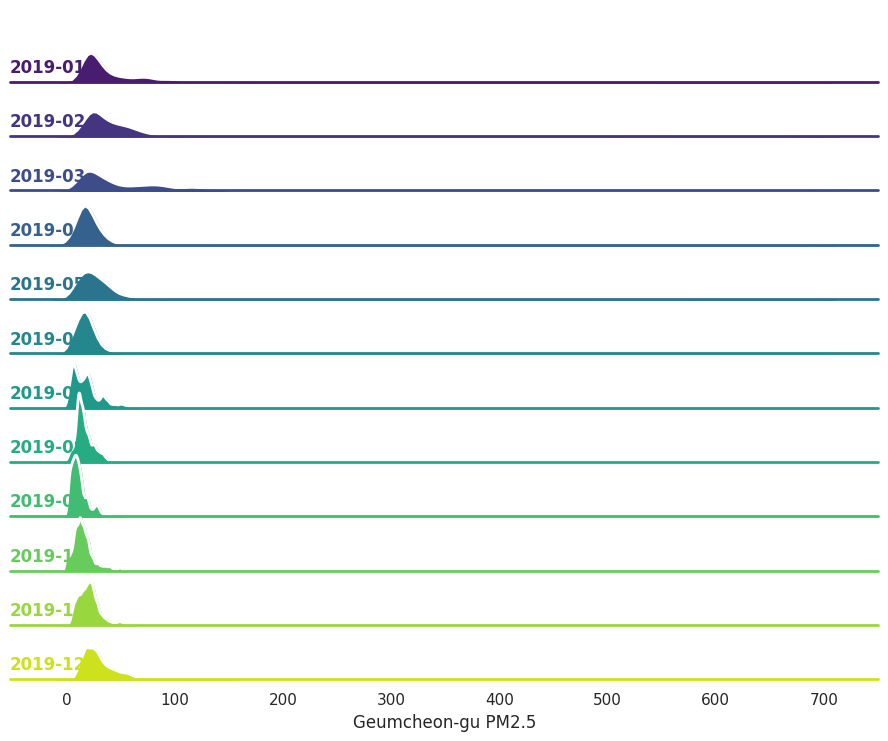

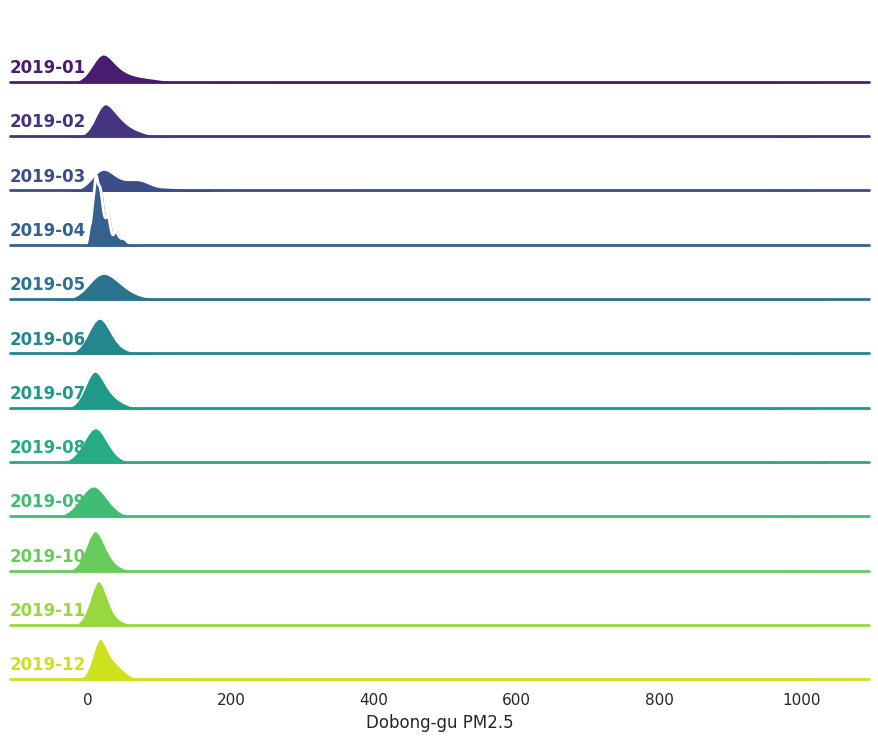

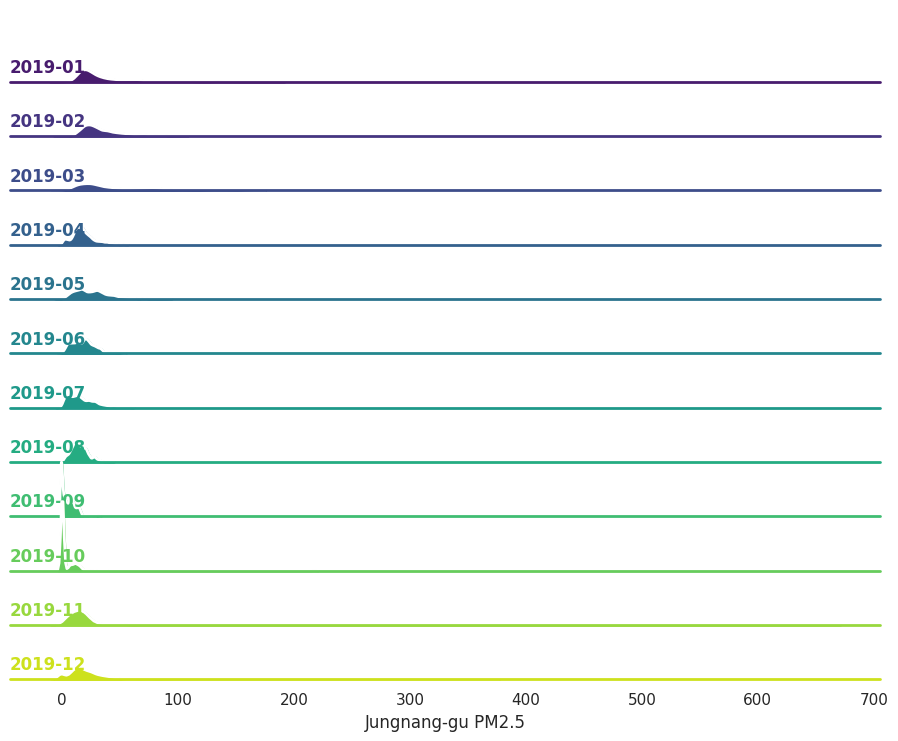

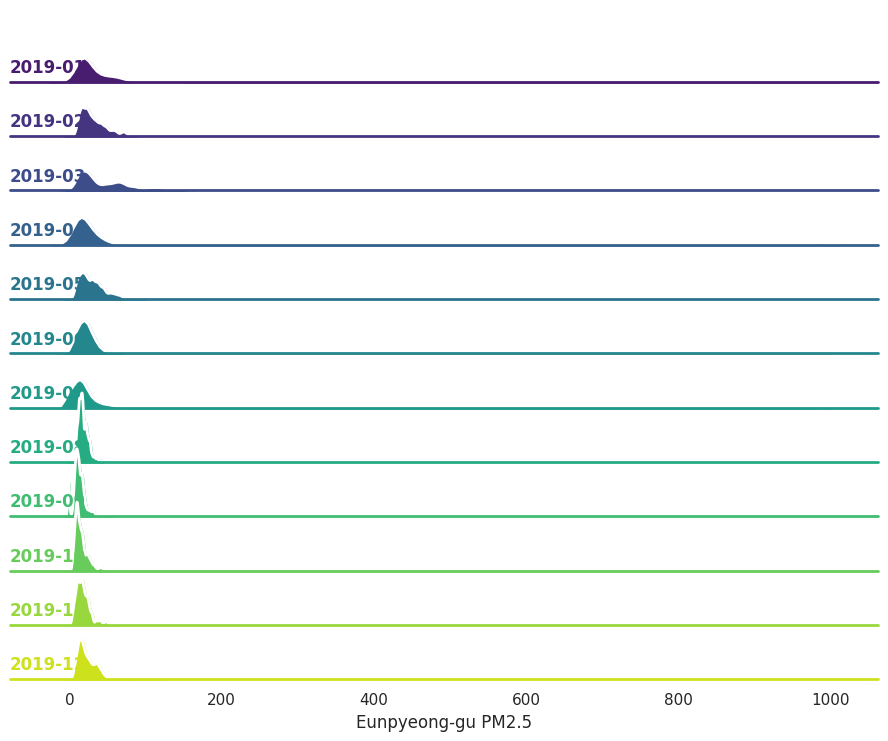

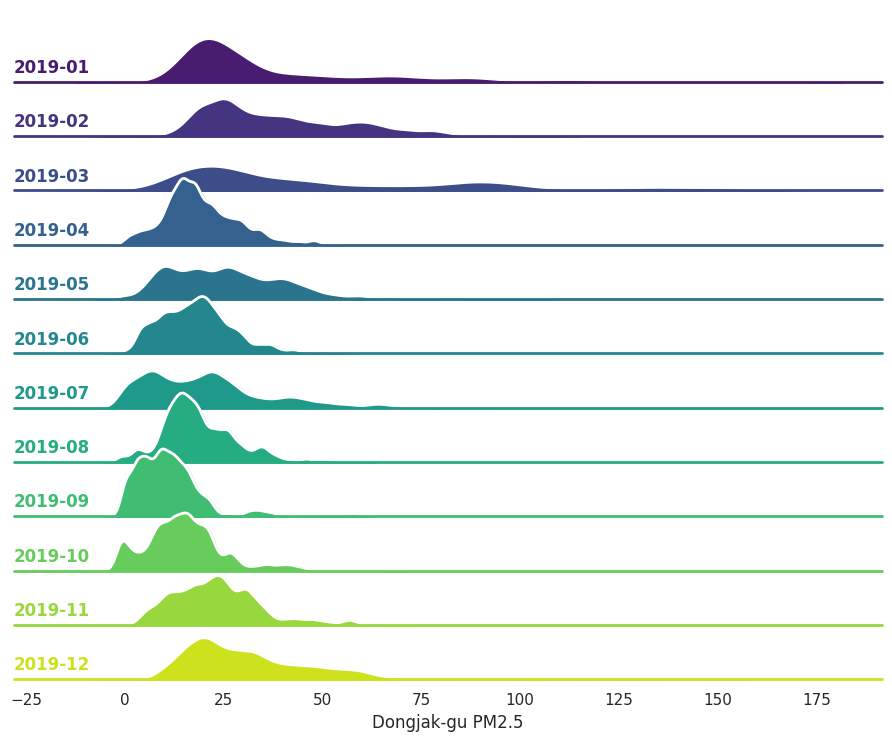

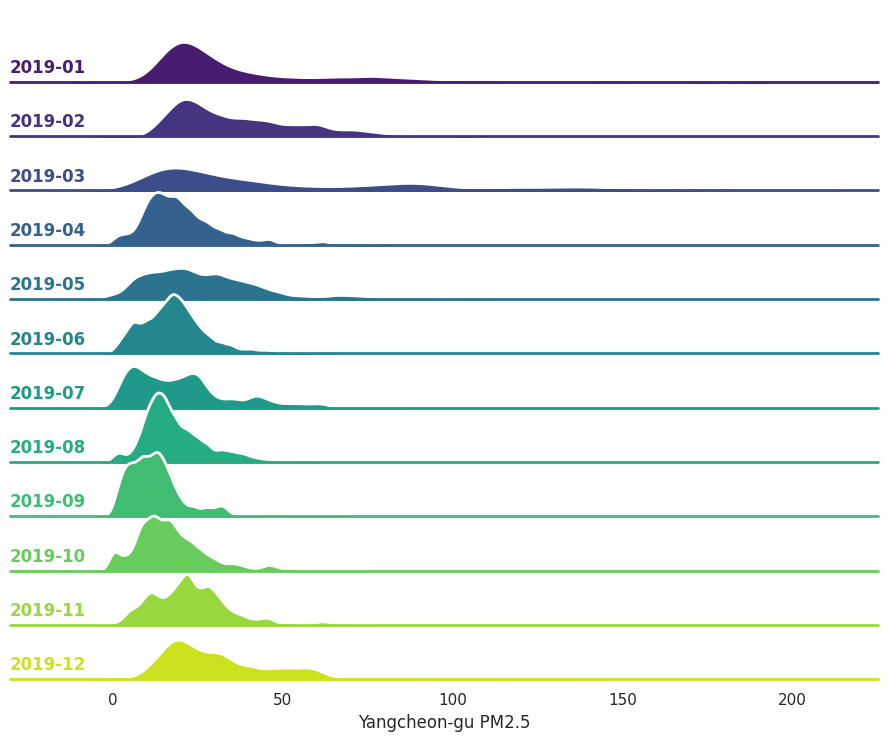

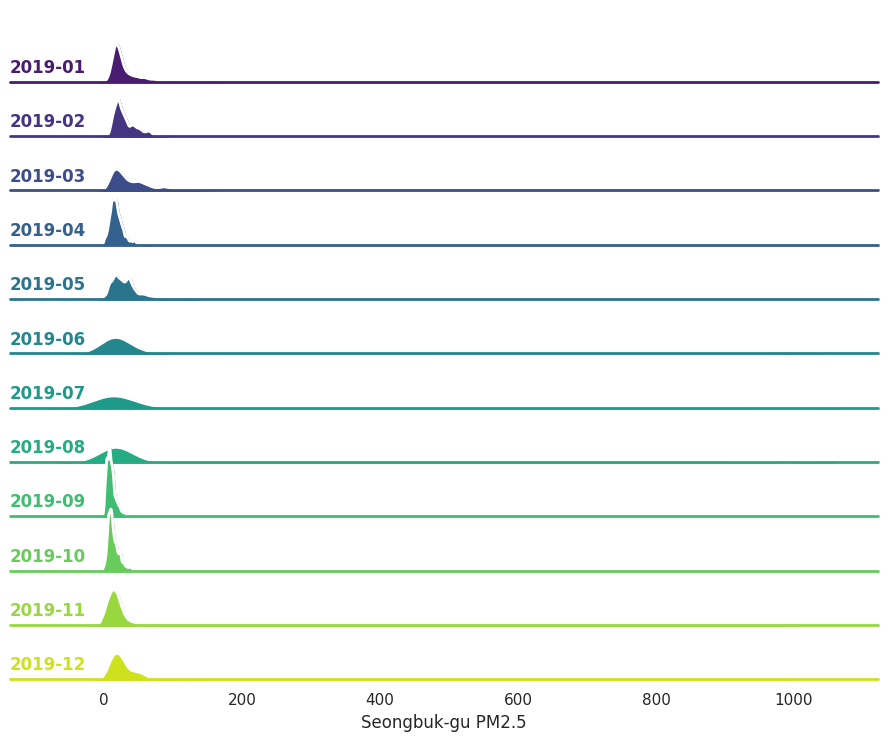

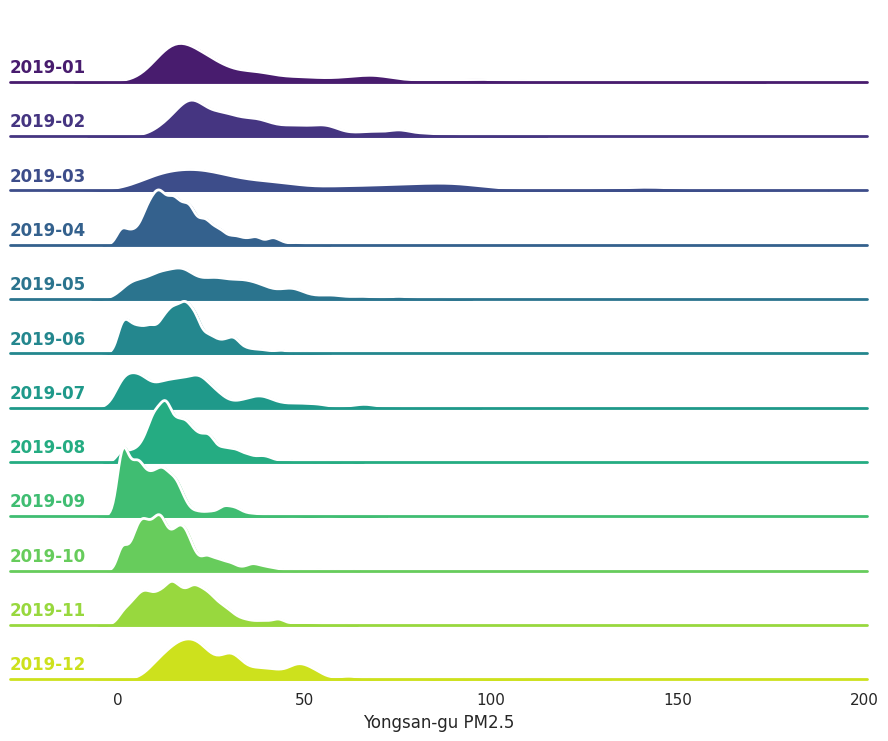

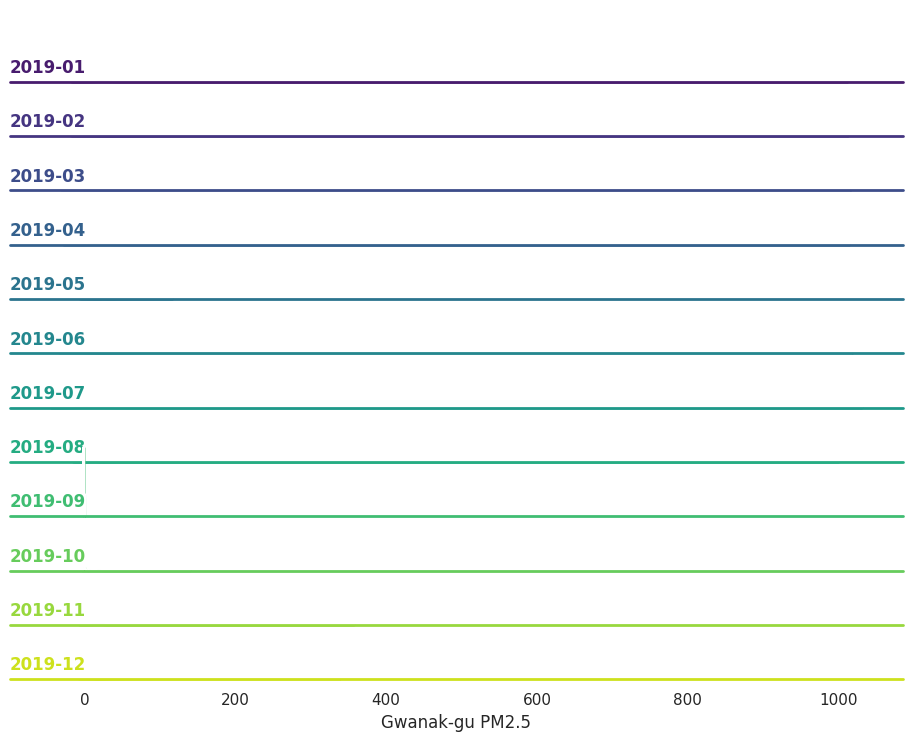

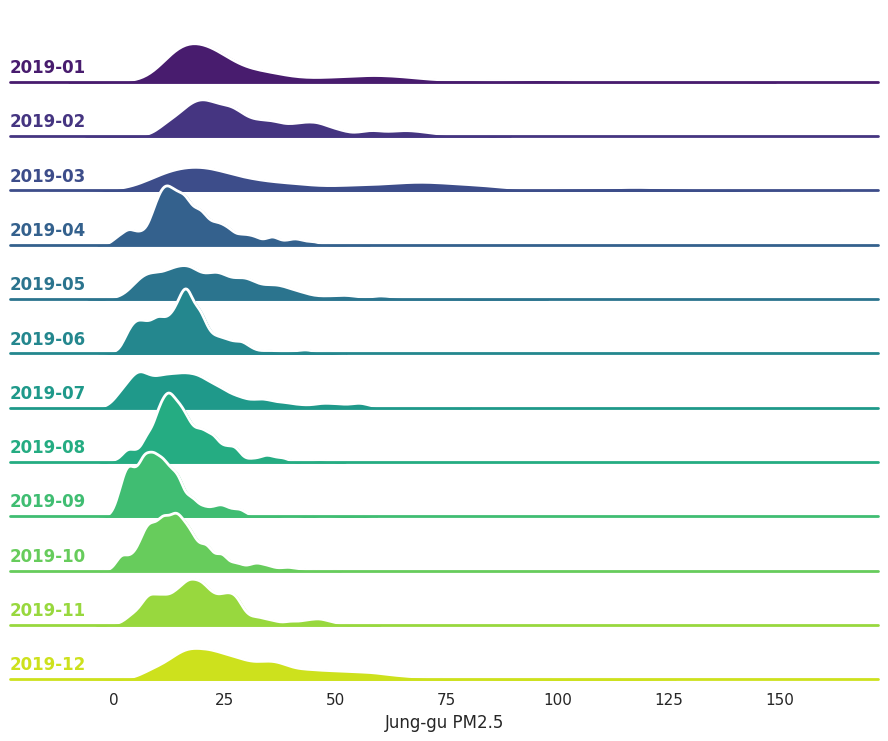

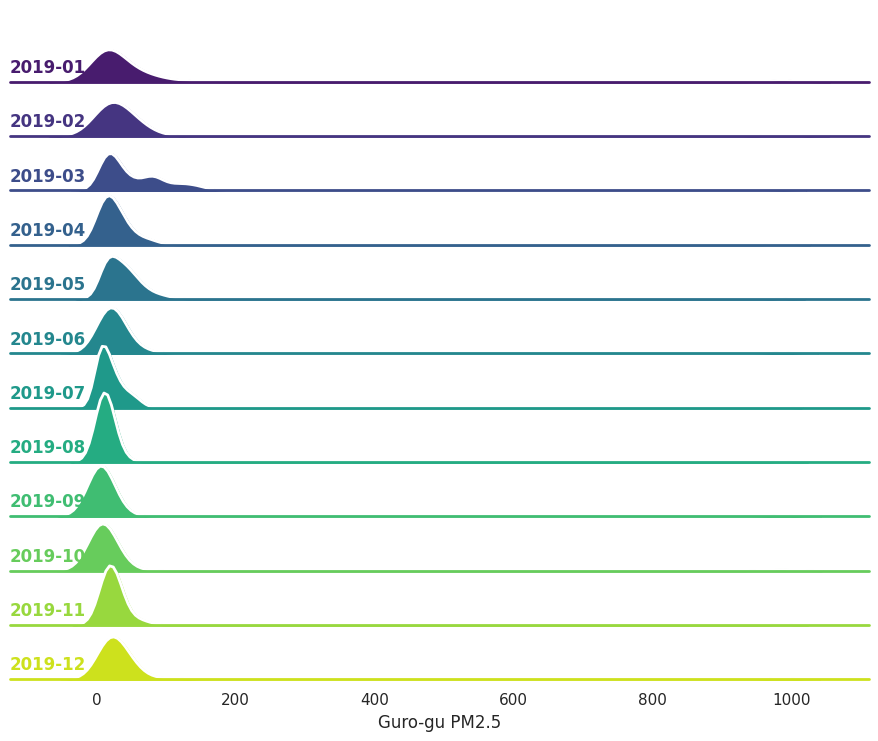

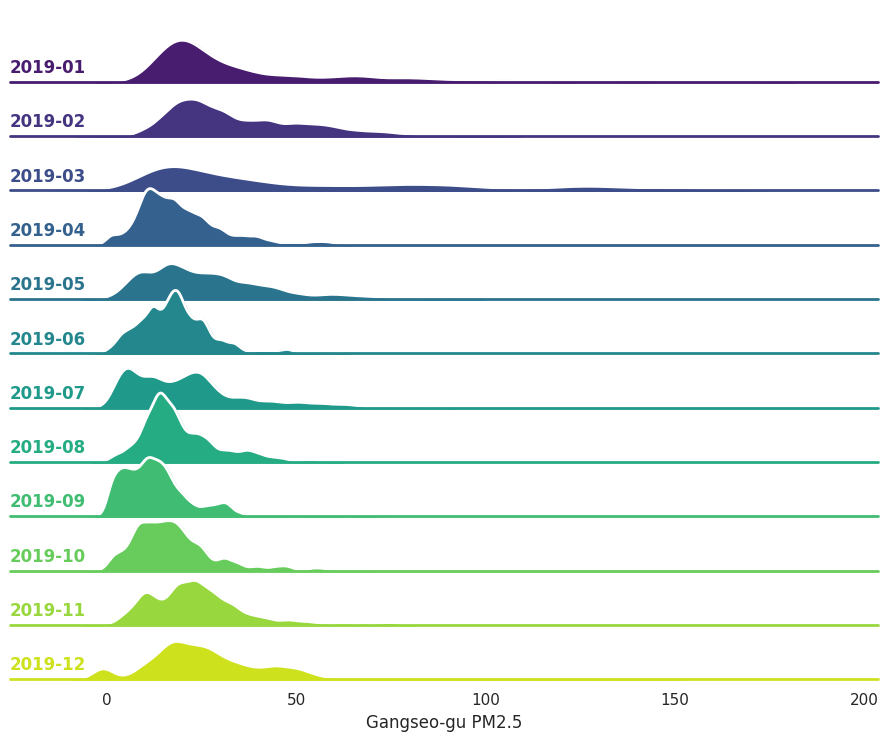

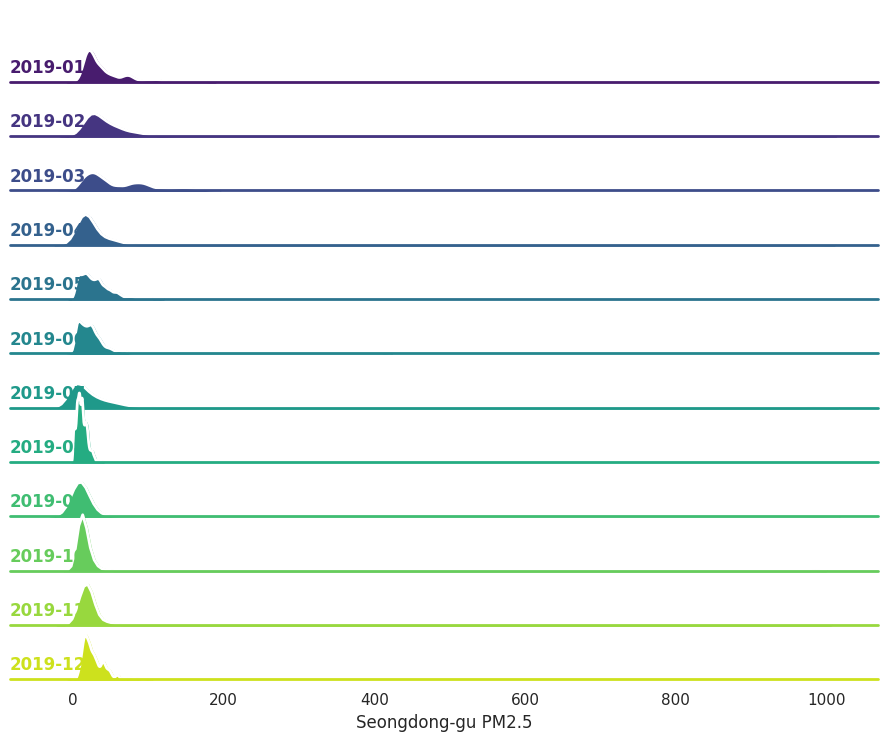

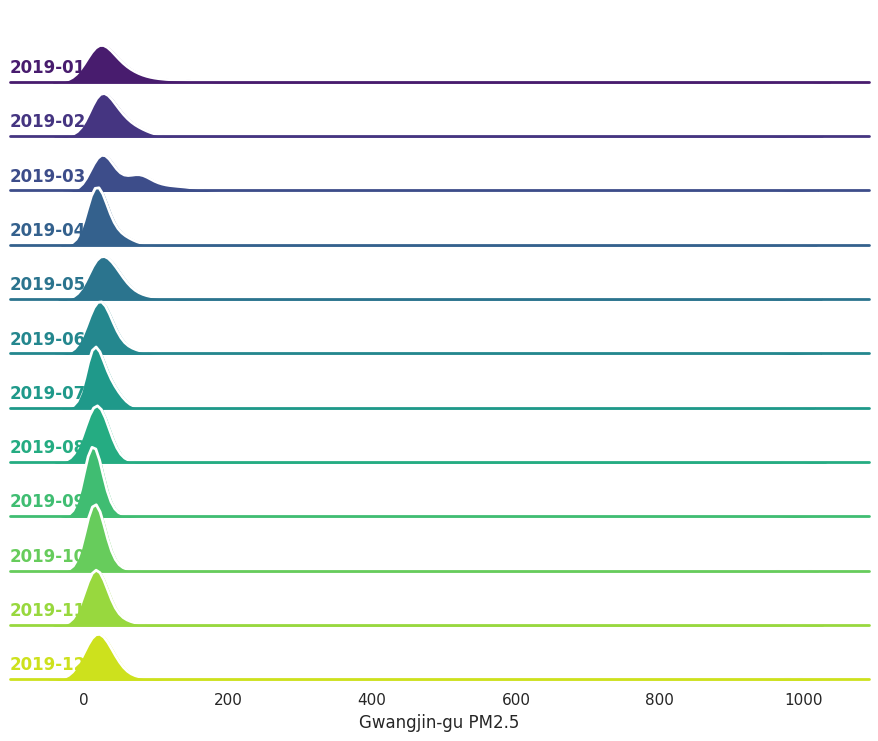

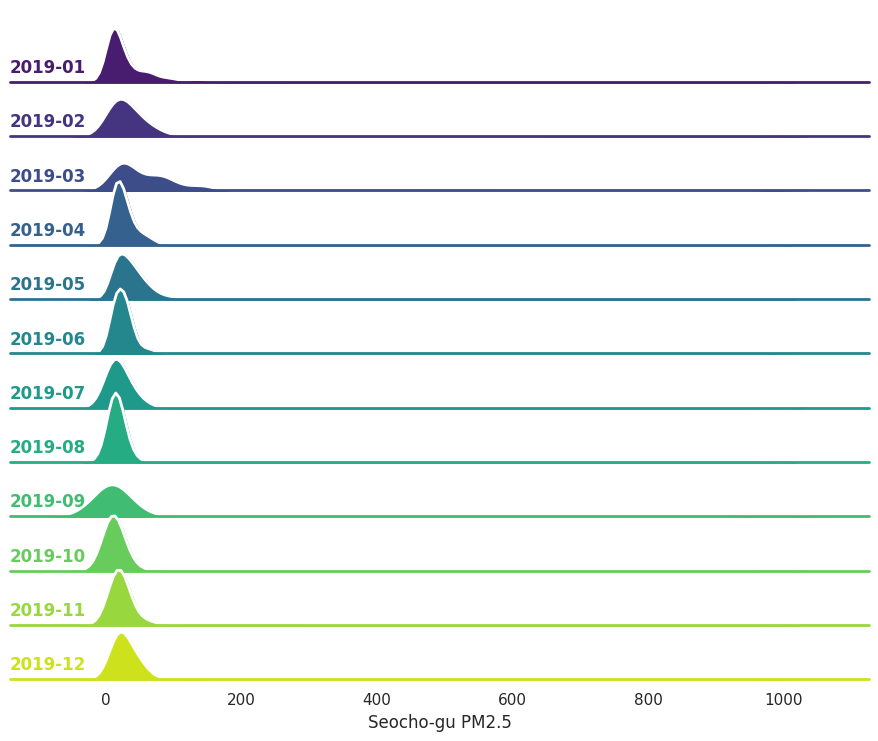

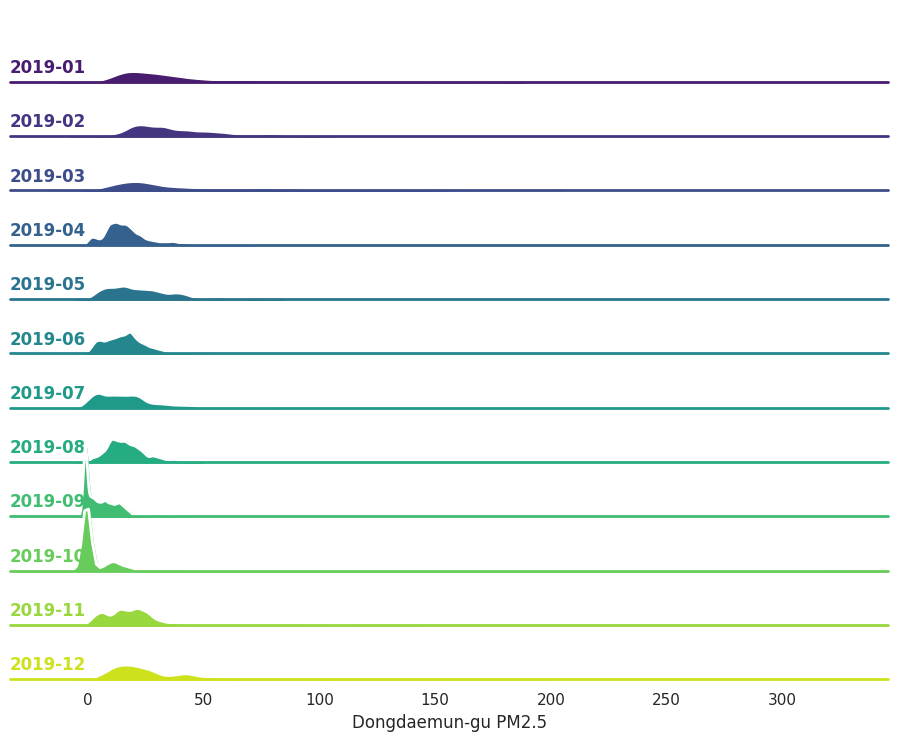

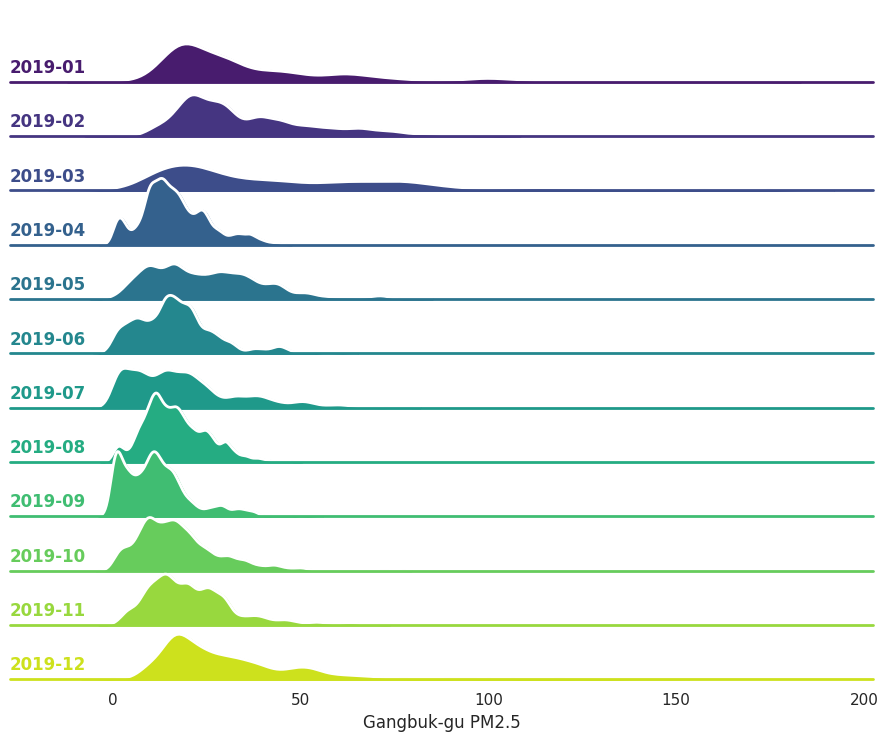

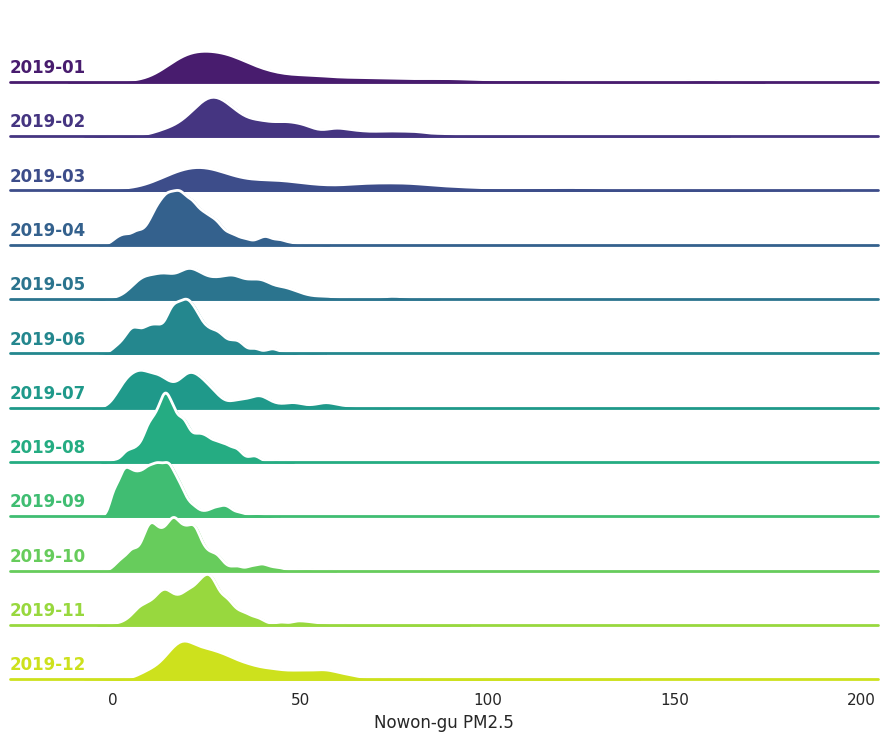

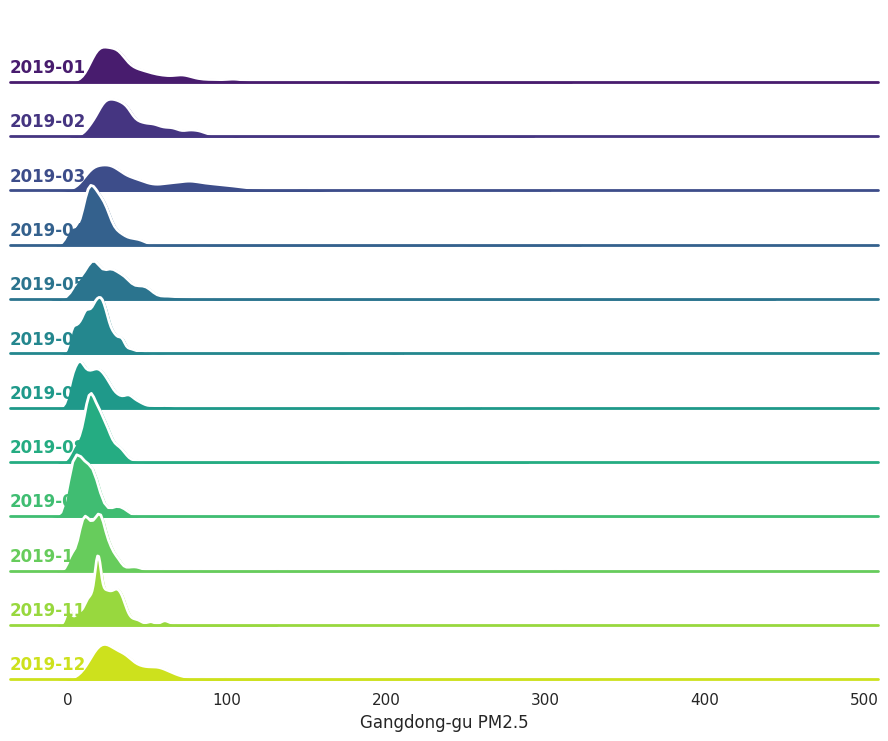

In [52]:


keep_sname = []
order = range(len(list_district))
for i in order:
    kde_ridge(df_hd19[i], 'PM2.5', 'YM', list_district[i])
    keep_sname.append('kde_' + str(i) + '.png')
    plt.savefig('kde_' + str(i) + '.png')
    plt.show()

Create photo collage

In [53]:
# to create a fit photo collage:
# width = number of columns * figure size // height = number of rows * figure size

get_collage(5, 5, 3510, 2805, keep_sname, 'Collage_kde_ridge.jpg')

0 0 0
1 0 561
2 0 1122
3 0 1683
4 0 2244
5 702 0
6 702 561
7 702 1122
8 702 1683
9 702 2244
10 1404 0
11 1404 561
12 1404 1122
13 1404 1683
14 1404 2244
15 2106 0
16 2106 561
17 2106 1122
18 2106 1683
19 2106 2244
20 2808 0
21 2808 561
22 2808 1122
23 2808 1683
24 2808 2244



## Resumen
estos ejemplos muestran algunas visualizaciones con ejemplos de código de Python para manejar líneas superpuestas en el gráfico de varias series de tiempo. Los dos conceptos principales son usar tramas interactivas y separarlas. El gráfico interactivo es útil con opciones que permiten a los usuarios seleccionar categorías libremente, mientras que separar los gráficos ayuda a los usuarios a compararlos fácilmente.
